<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/S3E26_eda_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **S3E26 Cirrosys - KAGGLE Competition**
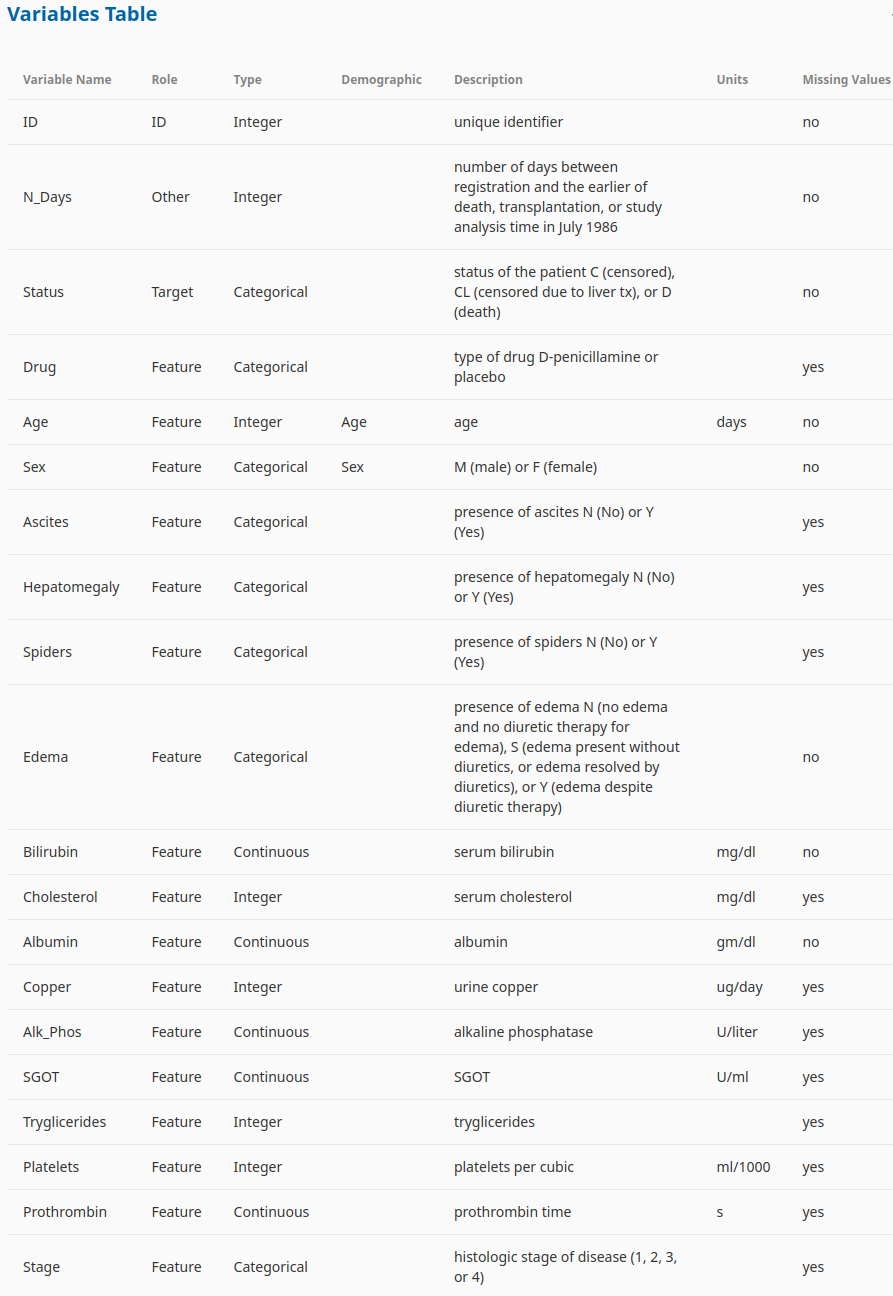
Evaluation
Submissions are evaluated using the multi-class logarithmic loss. Each id in the test set had a single true class label, Status. For each id, you must submit a set of predicted probabilities for each of the three possible outcomes, e.g., Status_C, Status_CL, and Status_D.

The metric is calculated


where
 is the number of rows in the test set,
 is the number of outcomes (i.e., 3),  
 is the natural logarithm,
 is 1 if row
 has the ground truth label
 and 0 otherwise, and
 is the predicted probability that observation
 belongs to class
.

The submitted probabilities for a given row are not required to sum to one because they are rescaled prior to being scored (each row is divided by the row sum). In order to avoid the extremes of the log function, predicted probabilities are replaced with
.

#### **Files:**
* train.csv - the training dataset; Hardness is the continuous target
* test.csv - the test dataset; your objective is to predict the value of Hardness
* sample_submission.csv - a sample submission file in the correct format
* Mineral_Dataset_Supplementary_Info.csv - Original Dataset

## 1.0 Workbook Set-up and Libraries:

#### 1.0 Libraries

In [1]:
%%capture
!pip install tensorflow-addons
#!pip install shap
#!pip install eli5
#!pip install tf-nightly
#!pip install -U scikit-learn==1.2.0
#!pip install catboost
#!pip install haversine
#!pip install pytorch-forecasting
!pip install umap-learn
#!pip install reverse_geocoder
#!pip install --upgrade protobuf
!pip install colorama
!pip install imbalanced-learn
!pip install optuna
!pip install optuna-integration
#!pip install pygam
!pip install keras-tuner --upgrade
#!pip install pycaret
#!pip install lightning==2.0.1
!pip install keras-nlp
#!pip install MiniSom

In [2]:
#importing modules

import warnings
warnings.filterwarnings('ignore')
import time
t = time.time()

print('Importing started...')

# basic moduele
import os
import numpy as np
import pandas as pd
import re
#from scipy import stats
from random import randint
import random
import math
import os
import gc
import pickle
from glob import glob
from IPython import display as ipd
from tqdm import tqdm
from datetime import datetime
from joblib import dump, load
import sklearn as sk
from imblearn.over_sampling import SMOTE, RandomOverSampler
from functools import partial
import itertools
import joblib
from itertools import combinations
import IPython
import statsmodels.api as sm
import IPython.display

# visualization moduels
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib_venn import venn2_unweighted
import seaborn as sns
import missingno as msno
import imblearn
import scipy.stats as stats
from scipy.special import boxcox, boxcox1p


# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
#sns.set_theme(style="ticks", context="notebook")
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# Style Import
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# preprocessing modules
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     cross_val_score,
                                     GroupKFold,
                                     GridSearchCV,
                                     RepeatedStratifiedKFold)

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss)


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  TweedieRegressor,
                                  ARDRegression,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              ExtraTreesClassifier)

from sklearn.base import BaseEstimator, TransformerMixin

# Other Models
#from pygam import LogisticGAM, s, te
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

#import catboost as cat
#from catboost import CatBoost, CatBoostRegressor
#from catboost import CatBoostClassifier

#from catboost.utils import get_roc_curve

from lightgbm import early_stopping
# check installed version
#import pycaret
warnings.filterwarnings("ignore")
#from minisom import MiniSom

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#Interpretiability of the model
#import shap
#import eli5
#from eli5.sklearn import PermutationImportance


## miss
from sklearn.pipeline import (make_pipeline,
                              Pipeline)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
import tensorflow_addons as tfa
from keras.utils import FeatureSpace
import keras_nlp

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization
# Model Tuning tools:
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour
%matplotlib inline
SEED = 1984
N_SPLITS = 10

print('Done, All the required modules are imported. Time elapsed: {} sec'.format(time.time()-t))

Importing started...
Using TensorFlow backend
Done, All the required modules are imported. Time elapsed: 6.624819040298462 sec


<Figure size 640x480 with 0 Axes>

In [3]:
# Check Versions:
print("CHECK VERSIONS:")
print(f"sns: {sns.__version__}")
print(f"mpl: {mpl.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sk.__version__}")
print(f"statsmodels: {sm.__version__}")
print(f"missingno: {msno.__version__}")
#print(f"TF-addon: {tfa.__version__}")
print(f"Inbalance_Learning: {imblearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
#print(f"CatBoost: {cat.__version__}")
#print(f"PyCaret: {pycaret.__version__}")

CHECK VERSIONS:
sns: 0.12.2
mpl: 3.7.1
tensorflow: 2.15.0
pandas: 1.5.3
numpy: 1.23.5
scikit-learn: 1.2.2
statsmodels: 0.14.0
missingno: 0.5.2
Inbalance_Learning: 0.10.1
XGBoost: 2.0.2


### **1.1 Utility Functions**

#### Graph Functions:

In [4]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['median'] = desc['50%'].values
    return summ


def scatter_plot_high_corr_pair(data_set=None, target=None, variable_pairs=None):
    num_pairs = len(variable_pairs)

    num_rows = (num_pairs + 2) // 3
    num_cols = min(num_pairs, 3)

    fig = plt.figure(figsize=(15, 5 * num_rows))
    spec = gridspec.GridSpec(num_rows, num_cols, width_ratios=[1]*num_cols, height_ratios=[1]*num_rows)

    for i, pair in enumerate(variable_pairs):
        x_var, y_var = pair
        row_index = i // 3
        col_index = i % 3

        ax = plt.subplot(spec[row_index, col_index])

        sns.scatterplot(x=x_var, y=y_var, hue=target, data=data_set, palette='viridis', ax=ax, s=10)
        sns.regplot(x=x_var, y=y_var, data=data_set, scatter=False, color='#FA7F6F', ax=ax)

        ax.set_title(f'{x_var} vs {y_var}')
        ax.set_xlabel(x_var)
        ax.set_ylabel(y_var)

    plt.tight_layout()
    plt.show()

def scatter_corr_plot(data_set=None, variables=None, target=None):
    if data_set is None or variables is None or target is None:
        raise ValueError("Please provide data_set and variables.")

    target = 'Hardness'

    full_features = data_set.columns.tolist()
    num_var = [column for column in data_set.columns if data_set[column].nunique() > 10]
    cat_var = [column for column in data_set.columns if data_set[column].nunique() < 10]


    num_rows = len(num_var)
    num_cols = 3

    total_plots = num_rows*num_cols
    plt.figure(figsize=(14,num_rows*2.5))

    for idx, col in enumerate(num_var):
        plt.subplot(num_rows, num_cols, idx % total_plots + 1)
        sns.scatterplot(x=col, y=target, data=data_set, color='#82B0D2',s=10)

        sns.regplot(x=col, y=target, data=data_set, scatter=False, color='#FA7F6F')

        corr_coef = data_set[target].corr(data_set[col])
        plt.text(0.95, 0.95, f"Corr: {corr_coef:.2f}", transform=plt.gca().transAxes, ha='right', va='top')
        mean_value = data_set[col].mean()

        plt.axvline(x=mean_value, color='black', linestyle='--', linewidth=1, label='Mean Value')
        plt.title(f"{col} : {target}")

    plt.tight_layout()
    plt.show()

def correlation_plot(data_train=None, data_test=None, variables=None):
    if data_train is None or data_test is None or variables is None:
        raise ValueError("Please provide data_train, data_test and variables.")
    corr_matrix_train = data_train[variables].corr()
    corr_matrix_test = data_test[variables].corr()

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10), gridspec_kw={'width_ratios': [0.80, 1.0]})
    sns.heatmap(corr_matrix_train, annot=True, cmap=palette_1, fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9}, ax=axes[0], cbar = False)
    axes[0].set_title('Train Set', fontsize=15)

    sns.heatmap(corr_matrix_test, annot=True, cmap=palette_1, fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9}, ax=axes[1], yticklabels=False, cbar = True, cbar_kws={"shrink": .50})
    axes[1].set_title('Test Set', fontsize=15)

    plt.suptitle('Correlation Matrices of Train and Test Sets', fontsize=25, weight = 'bold',y=0.9)
    for ax in axes:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    plt.subplots_adjust(top=1)
    plt.tight_layout()
    plt.show()

def scatter_plot_high_corr_pair(data_set=None, target=None, variable_pairs=None):
    num_pairs = len(variable_pairs)

    num_rows = (num_pairs + 2) // 3
    num_cols = min(num_pairs, 3)

    fig = plt.figure(figsize=(10, 3.5 * num_rows))
    spec = gridspec.GridSpec(num_rows, num_cols, width_ratios=[1]*num_cols, height_ratios=[1]*num_rows)

    for i, pair in enumerate(variable_pairs):
        x_var, y_var = pair
        row_index = i // 3
        col_index = i % 3

        ax = plt.subplot(spec[row_index, col_index])

        sns.scatterplot(x=x_var, y=y_var, hue=target, data=data_set, palette="viridis", ax=ax, s=10)
        sns.regplot(x=x_var, y=y_var, data=data_set, scatter=False, color='#FA7F6F', ax=ax)

        ax.set_title(f'{x_var} vs {y_var}', fontsize=10)
        ax.set_xlabel(x_var, fontsize=7)
        ax.set_ylabel(y_var, fontsize=7)

    plt.tight_layout()
    plt.show()

def plot_boxplot_and_hist(data, variable):
   #figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
   f, (ax_box, ax_hist) = plt.subplots( 2, 1, sharex =False, gridspec_kw ={"height_ratios": (0.50, 0.85)}, figsize=(8,4))
   # assigning a graph to each ax
   sns.boxplot( x = data[variable], ax = ax_box)
   sns.histplot( data = data, x = variable, ax = ax_hist, bins=40)
   # Remove x axis name for the boxplot
   ax_box.set( xlabel ='')
   ax_box.set_title(variable)
   plt.tight_layout()


def diagnostic_plots( df, variable):
  plt.figure( figsize =(8,3))
  plt.subplot( 1, 2, 1)
  df[variable].hist( bins = 30)
  plt.title( f" Histogram of {variable}")
  plt.subplot( 1, 2, 2)
  stats.probplot( df[ variable], dist ="norm", plot = plt)
  plt.title( f" Q-Q plot of {variable}")
  plt.show()
  plt.tight_layout()

#### Data Analysis Functions

In [5]:
def adversarial_validation(data_train, data_test, target='Hardness',is_train_test="True"):

    adv_train = data_train.drop(target, axis = 1)
    adv_test = data_test.copy()
    if is_train_test==False:
      adv_test = adv_test.drop(target, axis = 1)

    adv_train['is_test'] = 0
    adv_test['is_test'] = 1
    adv = pd.concat([adv_train, adv_test], ignore_index = True)
    adv_shuffled = adv.sample(frac = 1)

    adv_X = adv_shuffled.drop('is_test', axis = 1)
    adv_y = adv_shuffled['is_test']

    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

    val_scores = []
    predictions = np.zeros(len(adv))

    for fold, (train_idx, val_idx) in enumerate(skf.split(adv_X, adv_y)):
        adv_lr = XGBClassifier(random_state = 42)
        adv_lr.fit(adv_X.iloc[train_idx], adv_y.iloc[train_idx])

        val_preds = adv_lr.predict_proba(adv_X.iloc[val_idx])[:,1]
        predictions[val_idx] = val_preds
        val_score = roc_auc_score(adv_y.iloc[val_idx], val_preds)
        val_scores.append(val_score)

    fpr, tpr, _ = roc_curve(adv['is_test'], predictions)

    plt.figure(figsize = (6, 6))
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", label="Indistinguishable Datasets")
    sns.lineplot(x=fpr, y=tpr, label="Adversarial Validation Classifier")
    plt.title(f'Train-Test Validation = {np.mean(val_scores):.5f}', weight = 'bold', size = 17)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

def search_high_corr_pairs(data_set = None, variables =None, threshold = 0.7):
    corr_matrix=data_set[variables].corr()
    high_corr_pairs=[]

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1,len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                print(f'\033[91m{corr_matrix.columns[i]}\033[0m and \033[91m{corr_matrix.columns[j]}\033[0m are highly linearly correlated, indicating the possibility of collinearity.')
                high_corr_pairs.append((corr_matrix.columns[i],corr_matrix.columns[j]))
    return high_corr_pairs


def transform_features(train,test):
  train_ = train.copy()
  test_ = test.copy()

  feat_log_transf = ["allelectrons_Total","density_Total","allelectrons_Average","atomicweight_Average",
                     "ionenergy_Average","zaratio_Average","density_Average"]

  feat_power_transf = ["val_e_Average","R_vdw_element_Average","el_neg_chi_Average"]

  log_transformer = FunctionTransformer(lambda x: np.log(x+1.0))
  power_transformer = FunctionTransformer(lambda x: np.power(x,2.0))

  for feat in feat_log_transf:
    train_[feat] = log_transformer.transform(train_[feat])
    test_[feat] = log_transformer.transform(test_[feat])

  for feat in feat_power_transf:
    train_[feat] = power_transformer.transform(train_[feat])
    test_[feat] = power_transformer.transform(test_[feat])

  return train_, test_


def replace_zeros(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_.replace({0:np.nan},inplace=True)
  test_.replace({0:np.nan},inplace=True)

  train_["nan_marker"] = train_.isna().any(axis=1).astype("int")
  test_["nan_marker"] = test_.isna().any(axis=1).astype("int")

  total = pd.concat([train_, test_], ignore_index=True)
  total.drop("Hardness",axis=1,inplace=True)

  total_col = list(total.columns)

  imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=50, random_state = 0)
  imputer.fit(total[total_col])
  train_[total_col] = imputer.transform(train_[total_col])
  test_[total_col] = imputer.transform(test_[total_col])

  return train_, test_

def clip_values(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_["allelectrons_Total"] = train_["allelectrons_Total"].clip(lower=1.9, upper=None, axis=None, inplace=False)
  test_["allelectrons_Total"] = test_["allelectrons_Total"].clip(lower=1.9, upper=None, axis=None, inplace=False)

  train_["allelectrons_Average"] = train_["allelectrons_Average"].clip(lower=1.7, upper=None, axis=None, inplace=False)
  test_["allelectrons_Average"] = test_["allelectrons_Average"].clip(lower=1.7, upper=None, axis=None, inplace=False)

  train_["val_e_Average"] = train_["val_e_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)
  test_["val_e_Average"] = test_["val_e_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)

  train_["atomicweight_Average"] = train_["atomicweight_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)
  test_["atomicweight_Average"] = test_["atomicweight_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)

  train_["density_Total"] = train_["density_Total"].clip(lower=0.01, upper=None, axis=None, inplace=False)
  test_["density_Total"] = test_["density_Total"].clip(lower=0.01, upper=None, axis=None, inplace=False)

  train_["el_neg_chi_Average"] = train_["el_neg_chi_Average"].clip(lower=1.0, upper=None, axis=None, inplace=False)
  test_["el_neg_chi_Average"] = test_["el_neg_chi_Average"].clip(lower=1.0, upper=None, axis=None, inplace=False)

  train_["R_vdw_element_Average"] = train_["R_vdw_element_Average"].clip(lower=1.2, upper=None, axis=None, inplace=False)
  test_["R_vdw_element_Average"] = test_["R_vdw_element_Average"].clip(lower=1.2, upper=None, axis=None, inplace=False)

  train_["R_cov_element_Average"] = train_["R_cov_element_Average"].clip(lower=0.2,upper=2.0,axis=None,inplace=False)
  test_["R_cov_element_Average"] = test_["R_cov_element_Average"].clip(lower=0.2,upper=2.0,axis=None,inplace=False)

  train_["zaratio_Average"] = train_["zaratio_Average"].clip(lower=0.3,upper=0.60, axis=None, inplace=False)
  test_["zaratio_Average"] = test_["zaratio_Average"].clip(lower=0.3,upper=0.60, axis=None, inplace=False)

  train_["density_Average"] = train_["density_Average"].clip(lower=0.01,upper=None, axis=None, inplace=False)
  test_["density_Average"] = test_["density_Average"].clip(lower=0.01,upper=None, axis=None, inplace=False)

  train_["ionenergy_Average"] = train_["ionenergy_Average"].clip(lower=2.1,upper=None, axis=None, inplace=False)
  test_["ionenergy_Average"] = test_["ionenergy_Average"].clip(lower=2.1,upper=None, axis=None, inplace=False)


  return train_, test_

def prepare_dataset(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_,test_ = transform_features(train_,test_)
  train_,test_ = replace_zeros(train_,test_)
  train_,test_ = clip_values(train_,test_)

  return train_, test_

### **1.2 Connect Drives**

In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


Connect to Google Drive:

In [7]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
folder_data = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S3E26_Cyrrosis"
models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E26_Cyrrosis"
folders_nn = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E26_Cyrrosis/neural_networks/"
folders_trees = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E26_Cyrrosis/trees_models/"

list_directories = [folder_data,models_folders,folders_nn,folders_trees]

for path in list_directories:
  try:
      os.mkdir(path)
  except OSError as error:
      print(f"{path} already exists")


os.chdir(folder_data)

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S3E26_Cyrrosis already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E26_Cyrrosis already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E26_Cyrrosis/neural_networks/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E26_Cyrrosis/trees_models/ already exists


## 2.0 Create Datasets

In [9]:
train = pd.read_csv('train.csv')
old_train = pd.read_csv("cirrhosis.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv('sample_submission.csv')

# Drop column id
#train.drop('id',axis=1,inplace=True)
#test.drop('id',axis=1,inplace=True)
old_train.dropna(inplace=True,axis=0)
old_train.rename({"ID":"id"},axis=1,inplace=True)

In [10]:
print("TRAIN DATA shape: {}".format(train.shape))
display(train.head(3))
print("OLD-TRAIN DATA: {}".format(old_train.shape))
display(old_train.head(3))
print("TEST DATA: {}".format(test.shape))
display(test.head(3))

TRAIN DATA shape: (7905, 20)


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D


OLD-TRAIN DATA: (276, 20)


,id,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0


TEST DATA: (5271, 19)


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0


In [11]:
summary(old_train).style.background_gradient(cmap='Reds')

data shape: (276, 20)


,data type,#missing,%missing,#unique,min,max,median
id,int64,0,0.000000,276,1.000000,312.000000,157.500000
N_Days,int64,0,0.000000,267,41.000000,4556.000000,1788.000000
Status,object,0,0.000000,3,nan,nan,nan
Drug,object,0,0.000000,2,nan,nan,nan
Age,int64,0,0.000000,275,9598.000000,28650.000000,18156.500000
Sex,object,0,0.000000,2,nan,nan,nan
Ascites,object,0,0.000000,2,nan,nan,nan
Hepatomegaly,object,0,0.000000,2,nan,nan,nan
Spiders,object,0,0.000000,2,nan,nan,nan
Edema,object,0,0.000000,3,nan,nan,nan


In [12]:
summary(train).style.background_gradient(cmap='Blues')

data shape: (7905, 20)


,data type,#missing,%missing,#unique,min,max,median
id,int64,0,0.000000,7905,0.000000,7904.000000,3952.000000
N_Days,int64,0,0.000000,461,41.000000,4795.000000,1831.000000
Drug,object,0,0.000000,2,nan,nan,nan
Age,int64,0,0.000000,391,9598.000000,28650.000000,18713.000000
Sex,object,0,0.000000,2,nan,nan,nan
Ascites,object,0,0.000000,2,nan,nan,nan
Hepatomegaly,object,0,0.000000,2,nan,nan,nan
Spiders,object,0,0.000000,2,nan,nan,nan
Edema,object,0,0.000000,3,nan,nan,nan
Bilirubin,float64,0,0.000000,111,0.300000,28.000000,1.100000


In [13]:
summary(test).style.background_gradient(cmap='Blues')

data shape: (5271, 19)


,data type,#missing,%missing,#unique,min,max,median
id,int64,0,0.000000,5271,7905.000000,13175.000000,10540.000000
N_Days,int64,0,0.000000,409,41.000000,4795.000000,1882.000000
Drug,object,0,0.000000,2,nan,nan,nan
Age,int64,0,0.000000,363,9598.000000,28650.000000,18806.000000
Sex,object,0,0.000000,2,nan,nan,nan
Ascites,object,0,0.000000,2,nan,nan,nan
Hepatomegaly,object,0,0.000000,2,nan,nan,nan
Spiders,object,0,0.000000,2,nan,nan,nan
Edema,object,0,0.000000,3,nan,nan,nan
Bilirubin,float64,0,0.000000,108,0.300000,28.000000,1.100000


In [14]:
print("Original train shape: {}".format(train.shape))
old_train.dropna(inplace=True)
train = pd.concat([train,old_train],axis=0)
print("New train shape: {}".format(train.shape))

Original train shape: (7905, 20)
New train shape: (8181, 20)


### 2.1 Feature Engeneerign:

In [15]:
def bin_features(df, features=[], bins_=[[]], drop={}):
  df_ = df.copy()

  dic_bin_feat =dict(zip(features,bins_))

  for feat in dic_bin_feat.keys():

    df_[f"{feat}_binned"] = pd.cut(df_[feat], bins=dic_bin_feat[feat], labels=list(range(len(dic_bin_feat[feat])-1)))
    df_[f"{feat}_binned"] = df_[f"{feat}_binned"].astype("int32")
    if drop[feat]==True:
      df_.drop(columns=[feat],inplace=True)


  return df_


def features_eng(train,test):
  total_df=pd.concat((train,test),axis=0)
  print(f"len(total_df):{len(total_df)}")

  #str->num
  total_df['Drug']=(total_df['Drug']=='Placebo').astype(np.int32)
  total_df['Sex']=(total_df['Sex']=='M').astype(np.int32)
  total_df['Ascites']=(total_df['Ascites']=='Y').astype(np.int32)
  total_df['Hepatomegaly']=(total_df['Hepatomegaly']=='Y').astype(np.int32)
  total_df['Spiders']=(total_df['Spiders']=='Y').astype(np.int32)

  def create_cat_dict(col):

      val_list = train[col].value_counts().sort_values(ascending=False).index
      return dict(zip(val_list, range(len(val_list))))

  Edema_dic = create_cat_dict('Edema')

  for c, dic in zip(['Edema'],
                        [Edema_dic]):
          total_df[c] = total_df[c].map(dic).astype(np.int64)

  total_df['count_disease']=total_df['Ascites']+total_df['Hepatomegaly']+total_df['Spiders']+total_df['Drug']+(total_df['Edema']>0).astype("int")

  total_df['Stage'] = total_df['Stage'].astype("int32")
  #target
  total_df['Status_C']=(total_df['Status']=='C').astype(np.int32)
  total_df['Status_CL']=(total_df['Status']=='CL').astype(np.int32)
  total_df['Status_D']=(total_df['Status']=='D').astype(np.int32)
  #total_df.drop(['Status'],axis=1,inplace=True)

  # Features Binning:
  total_df["Age"] = total_df["Age"]/365
  total_df["N_Days"] = total_df["N_Days"]/365
  total_df["Albumin"] = 20/total_df["Albumin"]
  total_df["Cholesterol"] = np.log(total_df["Cholesterol"])
  total_df["Alk_Phos"] = np.log(total_df["Alk_Phos"])
  total_df["SGOT"] = np.log(total_df["SGOT"])
  total_df["Tryglicerides"] = np.log(total_df["Tryglicerides"])

  list_to_bin = ["Age","N_Days","Prothrombin","Bilirubin","Albumin","Cholesterol","Copper","Alk_Phos",
                 "SGOT","Tryglicerides","Platelets"
                 ]
  list_bins = [[10,30,45,55,60,65,70,75,95],[0.0,2.5,5.0,7.5,10.0,15.0],[5.0,10.0,11.5,13.0,20.0],[0.0,5.0,10.0,30.0],[0.0,5.5,6.5,15.0],[0.0,6.5,15.0],
               [0.0,90.0,120.0,1100.0],[0.0,7.6,15.0],
               [0.0,5.0,15.0],[0.0,5.4,15.0],[0.0,150.0,200.0,1000.]
               ]
  drop_dict = dict(zip(list_to_bin,[True,True,False,False,False,False,False,False,False,False,False]))

  total_df_ = bin_features(total_df, features=list_to_bin, bins_=list_bins, drop=drop_dict)

  # Features TransFormations:
  total_df_["Prothrombin"] = np.log(total_df_.Prothrombin-total_df_.Prothrombin.min()+1.0)
  total_df_["Bilirubin"] = np.log(total_df_["Bilirubin"])

  total_df_["Bil_Prot"] = total_df_["Bilirubin"].multiply(total_df_["Prothrombin"])
  total_df_["bill_proh_binned"] = total_df_["Bilirubin_binned"].astype("float").add(total_df_["Prothrombin_binned"].astype("float"))
  total_df_["bill_proh_binned"] = total_df_["bill_proh_binned"].astype("int32")

  total_df_["Albumin"] = np.log(total_df_["Albumin"]-total_df_["Albumin"].min()+1.01)
  total_df_["Copper"] = np.log(total_df_["Copper"])
  total_df_["Platelets_binned"].replace({2:0,0:2},inplace=True)

  total_df_["all_tests"] = total_df_["Prothrombin_binned"].replace({0:0,1:0,2:1,3:1}).astype("int")+total_df_["Bilirubin_binned"].replace({0:0,1:0,2:1,3:1}).astype("int")+total_df_["Albumin_binned"].replace({0:0,1:0,2:1}).astype("int")+\
                        total_df_["Cholesterol_binned"].astype("int") + total_df_["Copper_binned"].replace({0:0,1:1,2:1}).astype("int") + total_df_["Alk_Phos_binned"].astype("int")+\
                        total_df_["SGOT_binned"].astype("int") + total_df_["Tryglicerides_binned"].astype("int") + total_df_["Platelets_binned"].replace({0:0,1:1,2:1}).astype("int")

  total_df_["all_tests_aged"] = total_df_["all_tests"]*total_df_["Age_binned"]
  total_df_["all_tests_aged"].replace(dict(zip(np.arange(5,13),[5]*len(np.arange(5,13)))),inplace=True)
  total_df_["all_tests_aged"].replace(dict(zip(np.arange(13,200),[6]*len(np.arange(13,200)))),inplace=True)
  total_df_["all_tests_aged_days"] = total_df_["all_tests_aged"]*total_df_["N_Days_binned"].replace({0:4,1:3,3:1,4:0})
  total_df_["all_tests_aged_days"].replace({2:1,3:1,4:1,5:1,6:1},inplace=True)
  total_df_["all_tests_aged_days"].replace(dict(zip(np.arange(7,16),[2]*len(np.arange(7,16)))),inplace=True)
  total_df_["all_tests_aged_days"].replace(dict(zip(np.arange(16,25),[3]*len(np.arange(16,25)))),inplace=True)
  total_df_["all_tests_aged_days"].replace(dict(zip(np.arange(25,1000),[4]*len(np.arange(25,1000)))),inplace=True)

  total_df_["all_tests_aged_days_ills"] = total_df_["all_tests_aged_days"]*total_df_["count_disease"]
  total_df_["all_tests_aged_days_ills"].replace({2:1,3:2,4:2,5:2},inplace=True)
  total_df_["all_tests_aged_days_ills"].replace({6:3,7:3,8:3,9:3},inplace=True)
  total_df_["all_tests_aged_days_ills"].replace(dict(zip(np.arange(10,100),[4]*len(np.arange(10,100)))),inplace=True)

  total_df_["all_tests_aged_days_ills_alt"] = total_df_["all_tests_aged_days"]+total_df_["count_disease"]
  total_df_["all_tests_aged_days_ills_alt"].replace({1:0,2:1,3:1,4:2,5:2,6:3,7:3,8:3},inplace=True)

  total_df_["all_tests_aged_days_ills_stage"] = total_df_["all_tests_aged_days_ills"]+total_df_["Stage"]
  total_df_["all_tests_aged_days_ills_stage"].replace({1:0,2:0,3:0,4:1,5:2,6:3,7:3,8:4},inplace=True)

  train_df=total_df_[:len(train)]
  #train_df.fillna(method='ffill', inplace=True)
  test_df=total_df_[len(train_df):]

  return train_df, test_df

train_df, test_df = features_eng(train,test)

len(total_df):13452


In [16]:
train_df.shape, test_df.shape, train_df.isna().sum().sum()

((8181, 41), (5271, 41), 0)

In [17]:
train_df

,id,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,...,Tryglicerides_binned,Platelets_binned,Bil_Prot,bill_proh_binned,all_tests,all_tests_aged,all_tests_aged_days,all_tests_aged_days_ills,all_tests_aged_days_ills_alt,all_tests_aged_days_ills_stage
0,0,0,1,0,0,0,0,0.832909,5.755742,0.982005,...,0,0,0.441965,0,2,5,2,0,1,0
1,1,1,0,0,0,0,0,-0.105361,5.897154,0.854148,...,0,0,-0.115750,1,0,0,0,0,0,0
2,2,1,0,0,1,1,2,1.193922,5.700444,0.847351,...,0,1,1.562048,2,3,3,1,2,2,3
3,3,1,0,0,0,0,0,-0.510826,5.545177,0.881261,...,0,0,-0.507378,1,0,0,0,0,0,0
4,4,1,0,0,1,0,0,0.095310,5.846439,0.778915,...,0,0,0.091070,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,0,0,0,1,0,0,-0.916291,5.505332,0.826912,...,0,0,-0.802184,1,0,0,0,0,0,0
308,309,1,0,0,0,0,0,-0.916291,5.560682,1.379366,...,0,0,-0.943431,1,1,3,2,1,1,0
309,310,0,0,0,0,0,0,0.530628,6.073045,0.982005,...,0,0,0.418378,1,1,4,2,0,1,0
310,311,0,0,0,0,0,0,0.693147,5.509388,1.108156,...,0,0,0.635124,1,0,0,0,0,0,0


In [18]:
targets = ['Status_C','Status_CL','Status_D','Status']

full_features = train_df.columns.tolist()
num_var = [column for column in train_df.drop(columns=targets).columns if train_df[column].nunique() > 10]
cat_var = [column for column in train_df.drop(columns=targets).columns if train_df[column].nunique() < 10]

In [19]:
summary(train_df).style.background_gradient(cmap='Blues')

data shape: (8181, 41)


,data type,#missing,%missing,#unique,min,max,median
id,int64,0,0.000000,7905,0.000000,7904.000000,3814.000000
Drug,int32,0,0.000000,2,0.000000,1.000000,1.000000
Sex,int32,0,0.000000,2,0.000000,1.000000,0.000000
Ascites,int32,0,0.000000,2,0.000000,1.000000,0.000000
Hepatomegaly,int32,0,0.000000,2,0.000000,1.000000,1.000000
Spiders,int32,0,0.000000,2,0.000000,1.000000,0.000000
Edema,int64,0,0.000000,3,0.000000,2.000000,0.000000
Bilirubin,float64,0,0.000000,111,-1.203973,3.332205,0.095310
Cholesterol,float64,0,0.000000,226,4.787492,7.481556,5.700444
Albumin,float64,0,0.000000,160,0.009950,1.932063,0.826912


In [20]:
train_df.isna().sum()

id                                0
Drug                              0
Sex                               0
Ascites                           0
Hepatomegaly                      0
Spiders                           0
Edema                             0
Bilirubin                         0
Cholesterol                       0
Albumin                           0
Copper                            0
Alk_Phos                          0
SGOT                              0
Tryglicerides                     0
Platelets                         0
Prothrombin                       0
Stage                             0
Status                            0
count_disease                     0
Status_C                          0
Status_CL                         0
Status_D                          0
Age_binned                        0
N_Days_binned                     0
Prothrombin_binned                0
Bilirubin_binned                  0
Albumin_binned                    0
Cholesterol_binned          

## 3.0 EDA

### 3.1 Categorical Features:

In [21]:
def plot_cat_features(df,cat_var):
  df_=df.copy()
  fig, axs = plt.subplots(9,3,figsize=(14,16))
  axs=np.ravel(axs)

  for num, cvar in enumerate(cat_var):
    stacked_cvar = df_.groupby(["Status",cvar])[cvar].agg("count").unstack("Status")
    stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', 'orange'],ax=axs[num])

  plt.tight_layout()

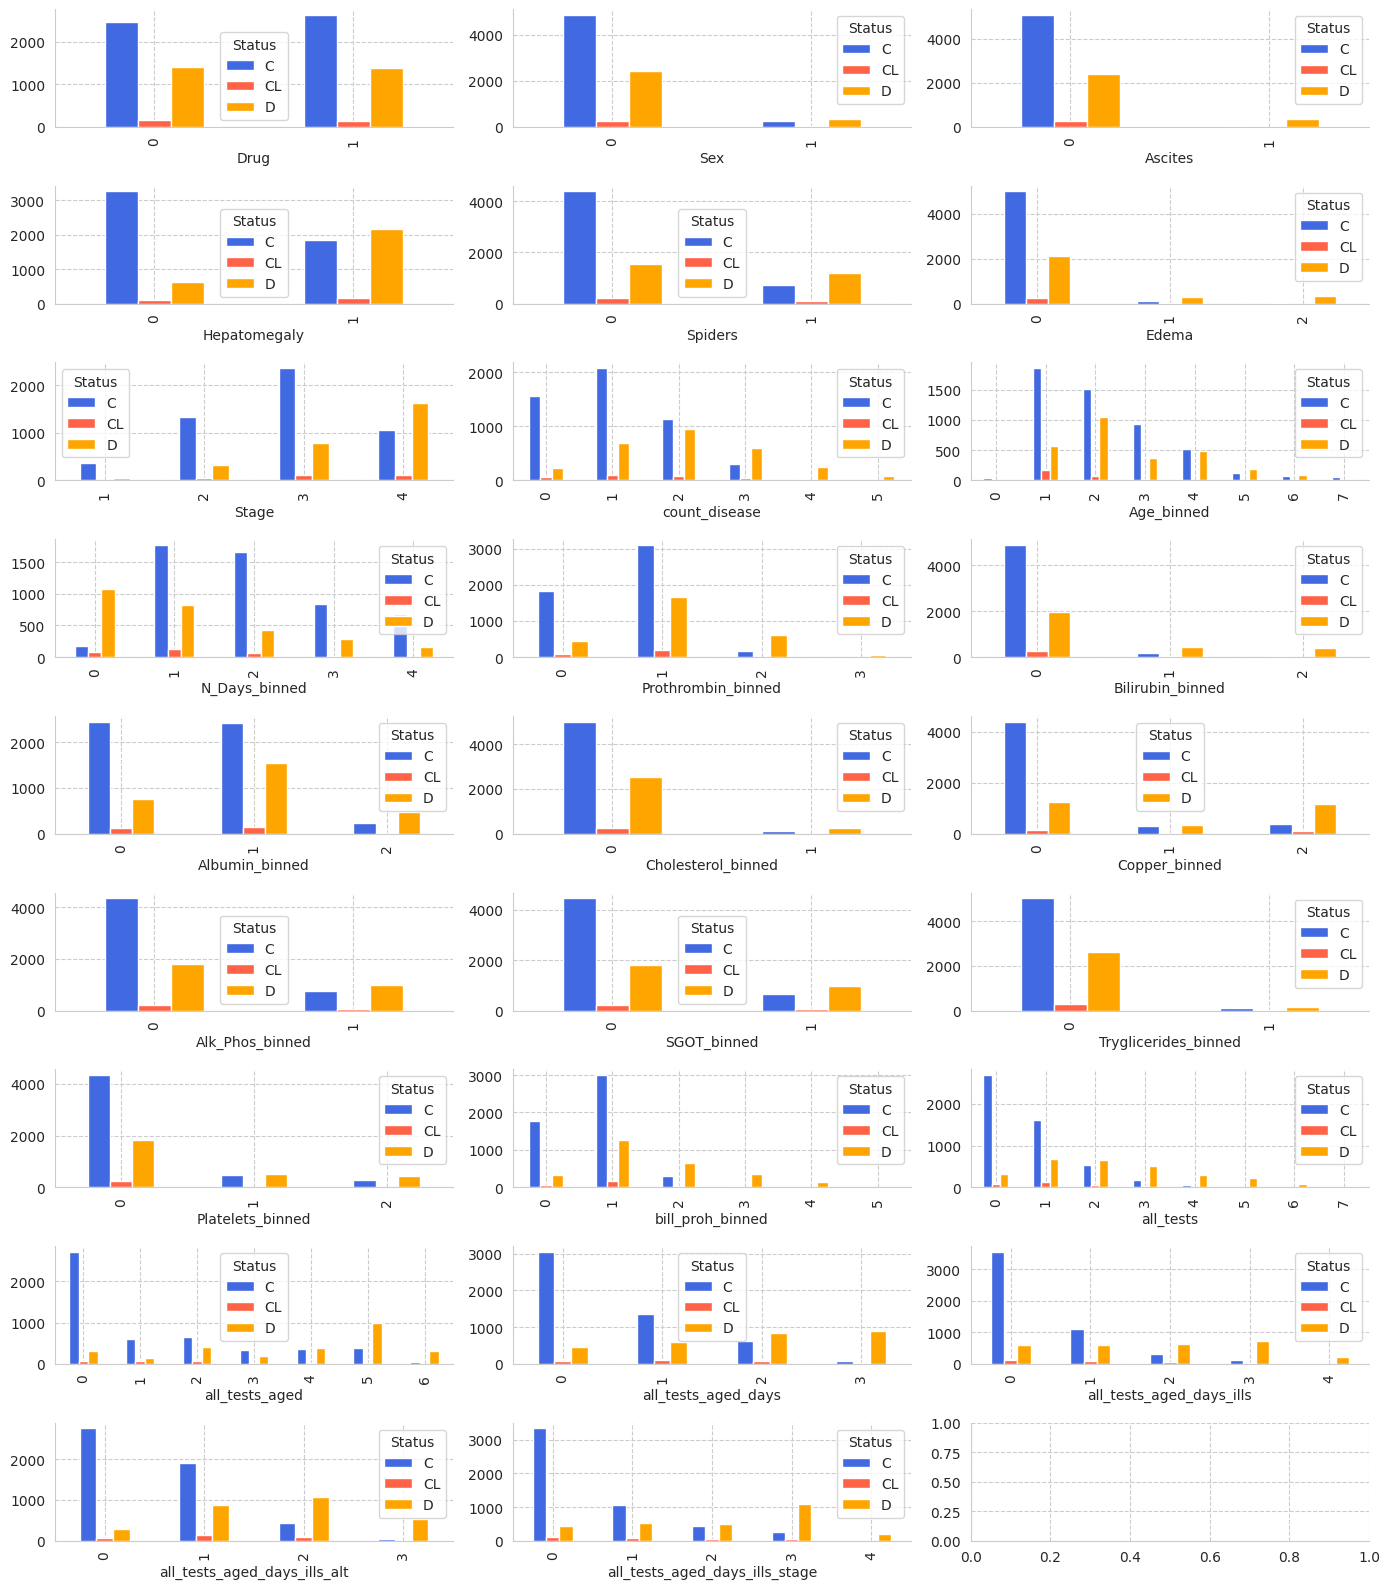

In [22]:
plot_cat_features(train_df,cat_var)

### 3.2 Categorical Potential Features:

Some Features can be turned into catefgorical:
* **age**
* **N_Days**
* **Prothrombin**

##### Age and N_Days

In [23]:
train_df_exp = train.copy()
train_df_exp["Age"] = train_df_exp["Age"]/365
train_df_exp["N_Days"] = train_df_exp["N_Days"]/365

In [24]:
train_df_exp["Age"].min(),train_df_exp["Age"].max()

(26.295890410958904, 78.4931506849315)

In [25]:
train_df_exp["N_Days"].min(),train_df_exp["N_Days"].max()

(0.11232876712328767, 13.136986301369863)

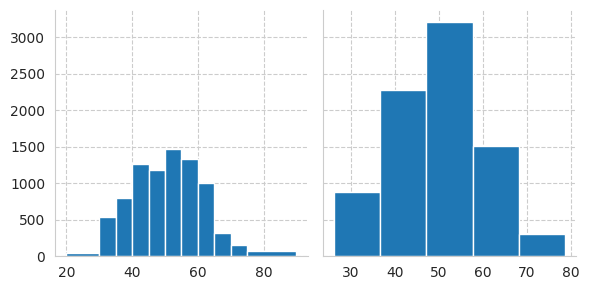

In [26]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(6,3))

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(train_df_exp["Age"], bins=[20,30,35,40,45,50,55,60,65,70,75,90]);
axs[1].hist(train_df_exp["Age"], bins=5);

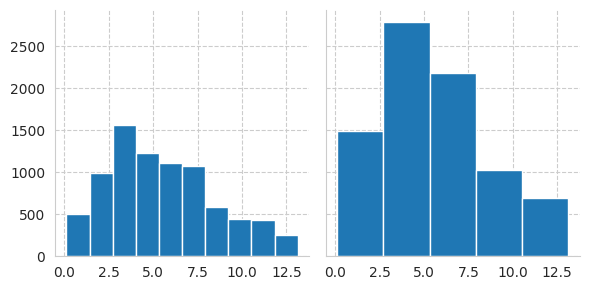

In [27]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(6,3))

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(train_df_exp["N_Days"], bins=10);
axs[1].hist(train_df_exp["N_Days"], bins=5);

In [28]:
train_df_exp["Age_binned"] = pd.cut(train_df_exp["Age"], bins=[10,30,45,55,60,65,70,75,95],labels=[0,1,2,3,4,5,6,7])
train_df_exp["N_Days_binned"] = pd.cut(train_df_exp["N_Days"], bins=[0.0,2.5,5.0,7.5,10,15],labels=[0,1,2,3,4])

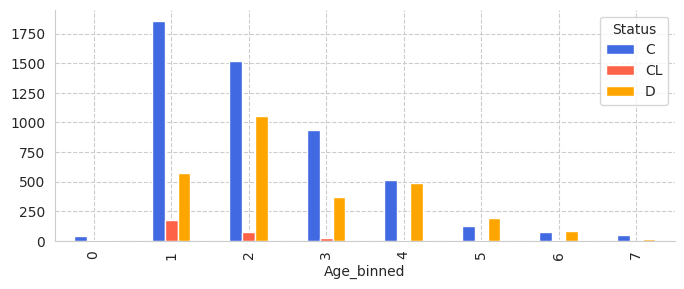

In [29]:
fig,axs=plt.subplots(1,1,figsize=(8,3),sharex=True)

stacked_cvar = train_df_exp.groupby(["Status","Age_binned"])["Age_binned"].agg("count").unstack("Status")
stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', 'orange'], ax=axs);

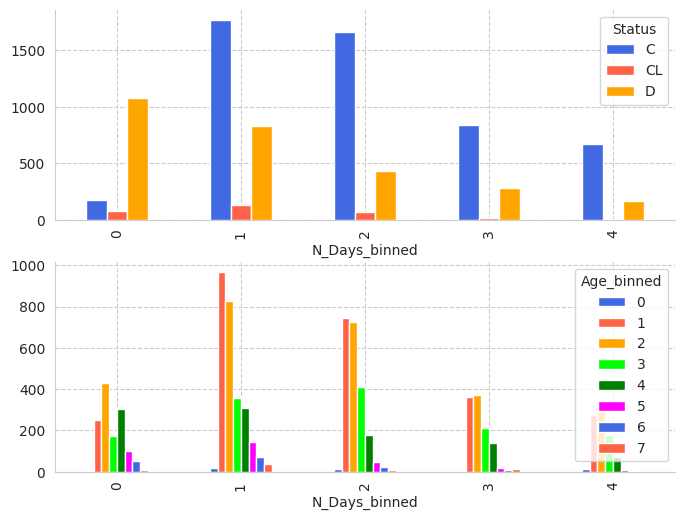

In [30]:
fig,axs=plt.subplots(2,1,figsize=(8,6))

stacked_cvar = train_df_exp.groupby(["Status","N_Days_binned"])["N_Days_binned"].agg("count").unstack("Status")
stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', 'orange'], ax=axs[0]);
stacked_cvar = train_df_exp.groupby(["Age_binned","N_Days_binned"])["N_Days_binned"].agg("count").unstack("Age_binned")
stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', 'orange',"lime","green","magenta"],ax=axs[1]);

In [31]:
summary(train_df).style.background_gradient(cmap='Blues')

data shape: (8181, 41)


,data type,#missing,%missing,#unique,min,max,median
id,int64,0,0.000000,7905,0.000000,7904.000000,3814.000000
Drug,int32,0,0.000000,2,0.000000,1.000000,1.000000
Sex,int32,0,0.000000,2,0.000000,1.000000,0.000000
Ascites,int32,0,0.000000,2,0.000000,1.000000,0.000000
Hepatomegaly,int32,0,0.000000,2,0.000000,1.000000,1.000000
Spiders,int32,0,0.000000,2,0.000000,1.000000,0.000000
Edema,int64,0,0.000000,3,0.000000,2.000000,0.000000
Bilirubin,float64,0,0.000000,111,-1.203973,3.332205,0.095310
Cholesterol,float64,0,0.000000,226,4.787492,7.481556,5.700444
Albumin,float64,0,0.000000,160,0.009950,1.932063,0.826912


##### **Prohrombin**

* **Alanine aminotransferase** (ALT) and aspartate aminotransferase (AST): These enzymes are elevated in liver damage, and their levels can be indicative of the severity of liver disease.

* **Bilirubin**: Elevated levels of bilirubin, a brownish pigment produced by the breakdown of red blood cells, indicate impaired liver function.

* **Albumin**: Albumin is a protein produced by the liver that plays a crucial role in maintaining fluid balance and nutrient transport. Low albumin levels suggest liver damage.

* **International normalized ratio** (INR): INR is a standardized measure of PT that provides a more consistent comparison between different laboratories. A prolonged INR suggests impaired clotting function, which is often observed in cirrhosis.

* **Copper**: increased copper excretion in the urine can be a sign of liver cirrhosis, it can also be caused by other conditions, such as Wilson's disease, primary biliary cirrhosis, and cholestatic liver diseases.



True

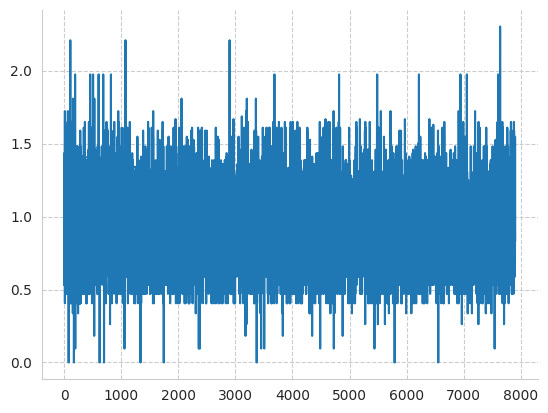

In [32]:
train_df.Prothrombin.plot()
(train_df.Prothrombin == train_df.Prothrombin).all()

In [33]:
train_df.groupby(["Status"])["Prothrombin"].agg(["mean","median","min","max","std","count"])

,mean,median,min,max,std,count
Status,,,,,,
C,0.846134,0.875469,0.000000,2.302585,0.248561,5112
CL,0.899979,0.916291,0.405465,1.722767,0.252519,293
D,1.078847,1.098612,0.000000,1.974081,0.285309,2776


In [34]:
prb_df = train_df.copy()
prb_df["prb_binned"] = pd.cut(train_df_exp["Prothrombin"], bins=[5.0,10.0,11.5,13.0,20.0],labels=[0,1,2,3])

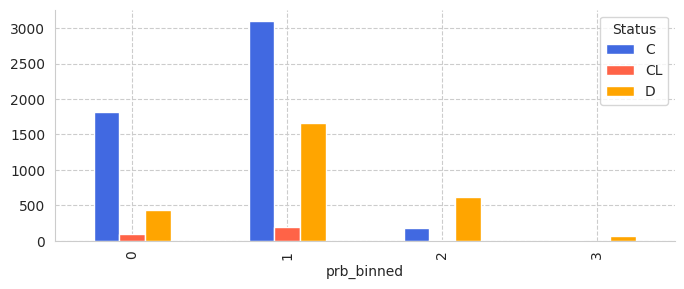

In [35]:
fig,axs=plt.subplots(1,1,figsize=(8,3),sharex=True)

stacked_cvar = prb_df.groupby(["Status","prb_binned"])["prb_binned"].agg("count").unstack("Status")
stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', "Orange"], ax=axs);

In [36]:
stacked_cvar

Status,C,CL,D
prb_binned,,,
0,1823,88,435
1,3105,190,1666
2,173,14,612
3,11,1,63


<Axes: >

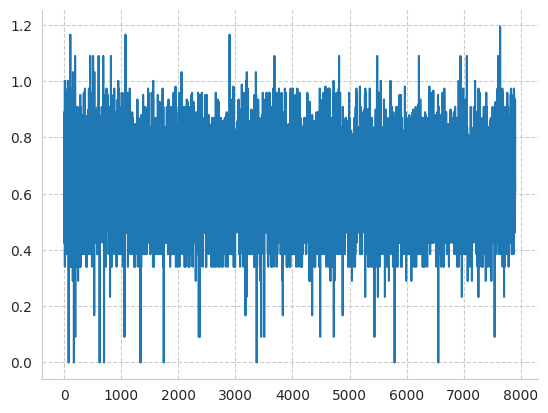

In [37]:
prb_df["Prothrombin"] = np.log(prb_df.Prothrombin-prb_df.Prothrombin.min()+1.0)
prb_df.Prothrombin.plot()

##### **Bilirubin**

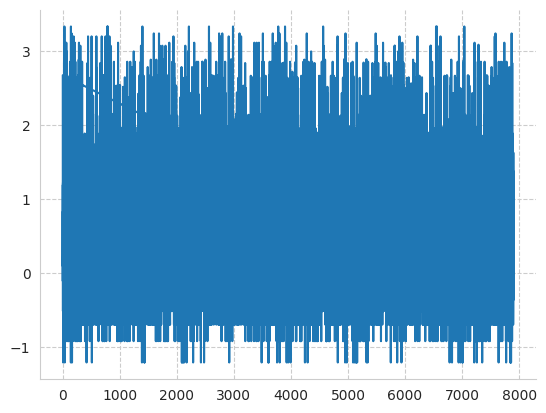

In [38]:
train_df["Bilirubin"].plot();

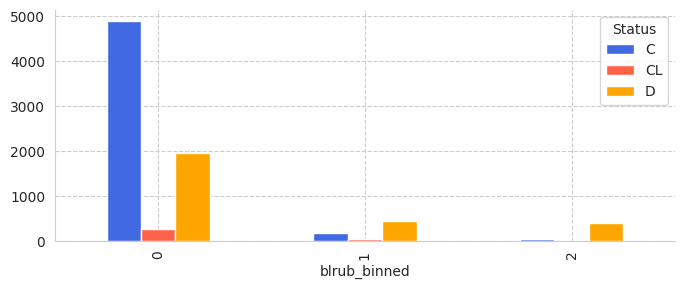

In [39]:
prb_df["blrub_binned"] = pd.cut(train_df_exp["Bilirubin"], bins=[0.0,5.0,10.0,30.0],labels=[0,1,2])

fig,axs=plt.subplots(1,1,figsize=(8,3),sharex=True)

stacked_cvar = prb_df.groupby(["Status","blrub_binned"])["blrub_binned"].agg("count").unstack("Status")
stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', "Orange"], ax=axs);

In [40]:
prb_df["bill_proh_binned"] = prb_df["blrub_binned"].astype("float").add(prb_df["prb_binned"].astype("float"))

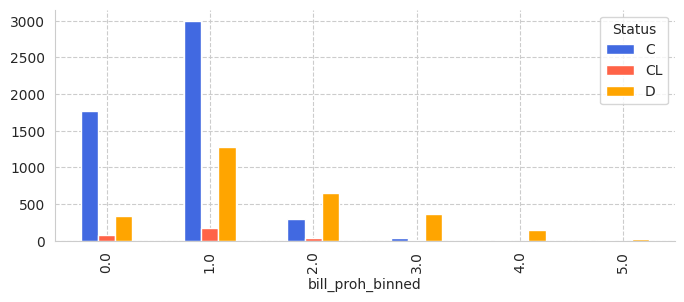

In [41]:
fig,axs=plt.subplots(1,1,figsize=(8,3),sharex=True)

stacked_cvar = prb_df.groupby(["Status","bill_proh_binned"])["bill_proh_binned"].agg("count").unstack("Status")
stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', "Orange"], ax=axs);

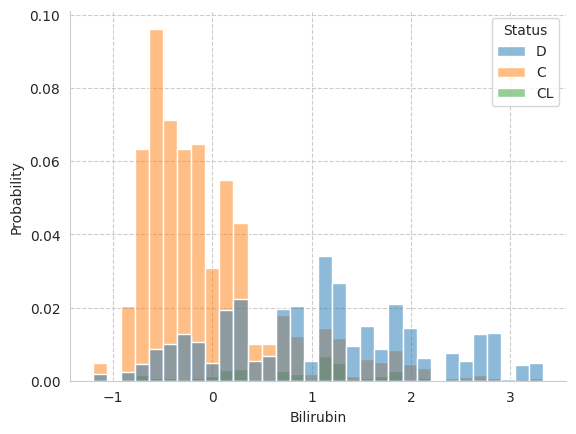

In [42]:
sns.histplot(data=prb_df, x="Bilirubin", hue="Status", stat="probability");

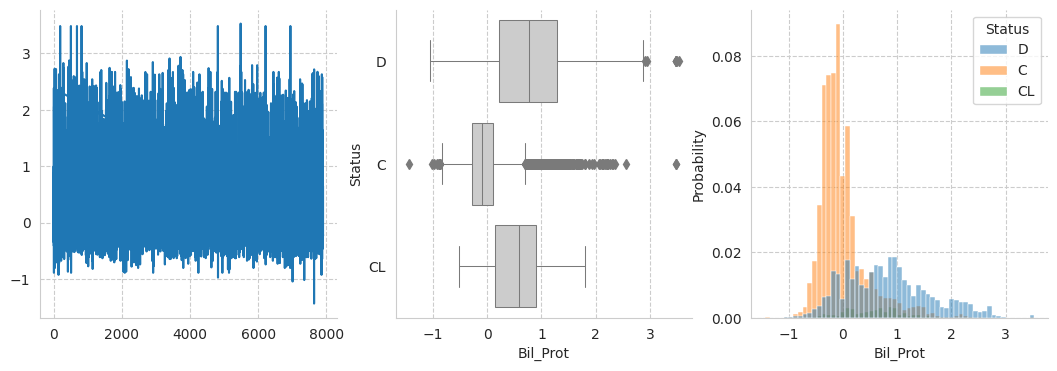

In [43]:
prb_df["Bil_Prot"] = prb_df["Bilirubin"].multiply(prb_df["Prothrombin"])

fig, axs = plt.subplots(1,3,figsize=(13,4))

prb_df["Bil_Prot"].plot(ax=axs[0])
sns.boxplot(data=prb_df, x="Bil_Prot", y="Status", color=".8", linewidth=.75, ax=axs[1])
sns.histplot(data=prb_df, x="Bil_Prot", hue="Status", stat="probability",ax=axs[2]);

##### **Albumin**

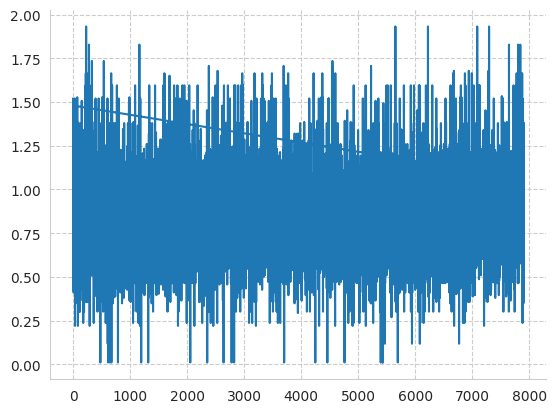

In [44]:
#prb_df["log_Albumin"] = np.log(prb_df["Albumin"]-prb_df["Albumin"].min()+1.01)
prb_df["Albumin"].plot();

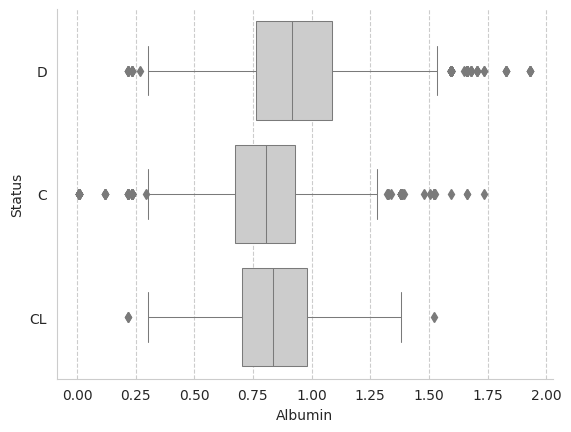

In [45]:
sns.boxplot(data=prb_df, x="Albumin", y="Status", color=".8", linewidth=.75);

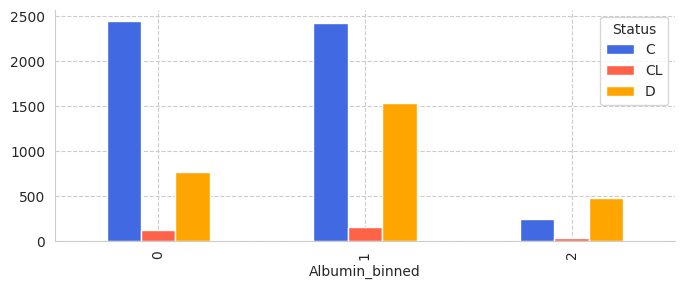

In [46]:
#train["Albumin_binned"] = pd.cut(train["Albumin"], bins=[0.0,5.5,6.5,15.0],labels=[0,1,2])

fig,axs=plt.subplots(1,1,figsize=(8,3),sharex=True)

stacked_cvar = prb_df.groupby(["Status","Albumin_binned"])["Albumin_binned"].agg("count").unstack("Status")
stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', "Orange"], ax=axs);

##### **Cholesterol**

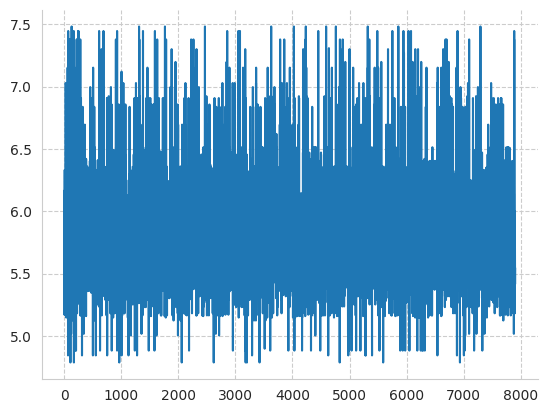

In [47]:
prb_df["Cholesterol"].plot();

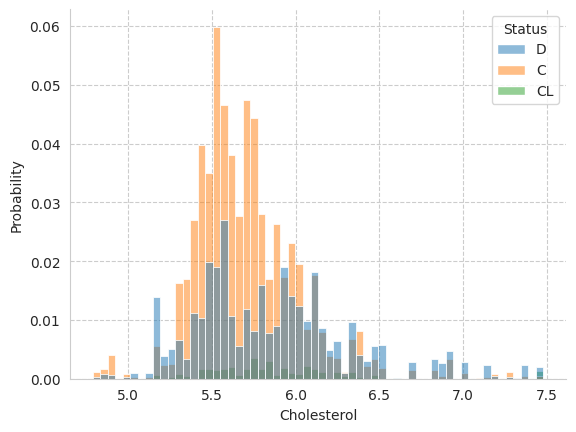

In [48]:
sns.histplot(data=prb_df, x="Cholesterol", hue="Status", stat="probability");

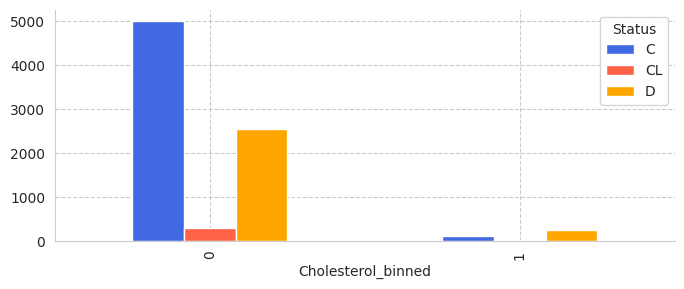

In [49]:
fig,axs=plt.subplots(1,1,figsize=(8,3),sharex=True)

stacked_cvar = prb_df.groupby(["Status","Cholesterol_binned"])["Cholesterol_binned"].agg("count").unstack("Status")
stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', "Orange"], ax=axs);

##### **Copper**

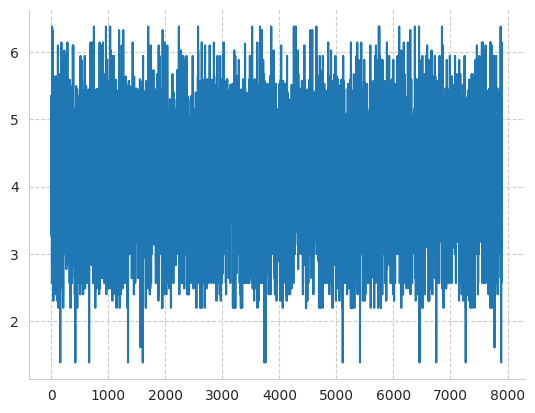

In [50]:
prb_df["Copper"].plot();

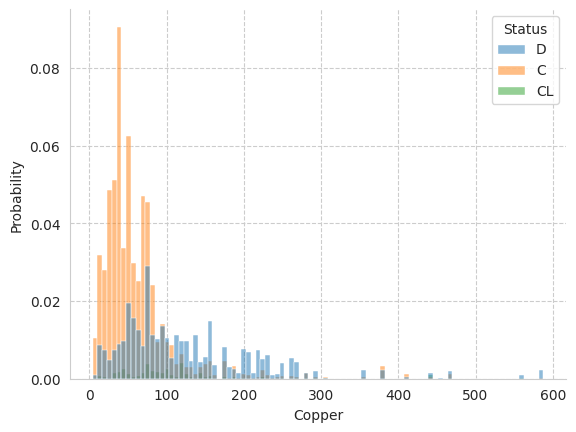

In [51]:
sns.histplot(data=train, x="Copper", hue="Status", stat="probability");

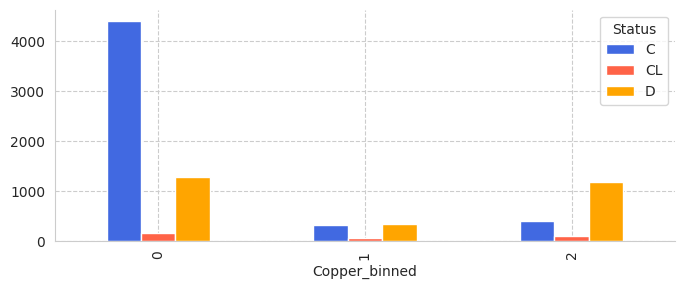

In [52]:
fig,axs=plt.subplots(1,1,figsize=(8,3),sharex=True)

stacked_cvar = prb_df.groupby(["Status","Copper_binned"])["Copper_binned"].agg("count").unstack("Status")
stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', "Orange"], ax=axs);

##### **Alk_Phos**

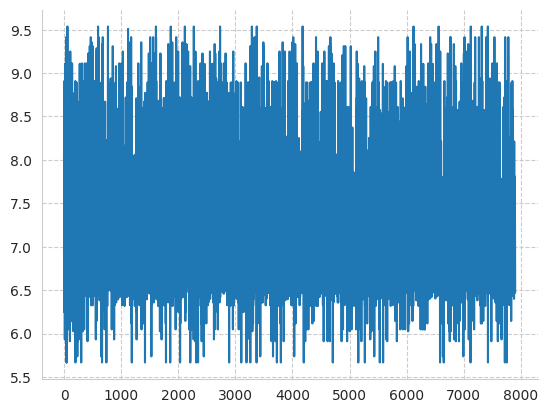

In [53]:
prb_df["Alk_Phos"].plot();

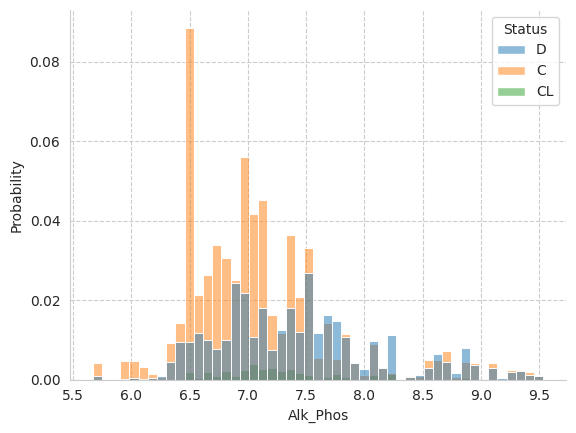

In [54]:
sns.histplot(data=prb_df, x="Alk_Phos", hue="Status", stat="probability");

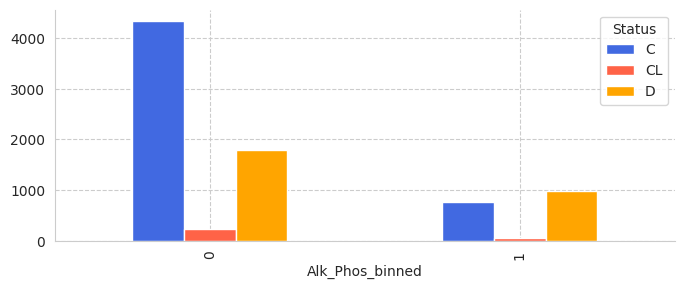

In [55]:
fig,axs=plt.subplots(1,1,figsize=(8,3),sharex=True)

stacked_cvar = prb_df.groupby(["Status","Alk_Phos_binned"])["Alk_Phos_binned"].agg("count").unstack("Status")
stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', "Orange"], ax=axs);

##### **SGOT**

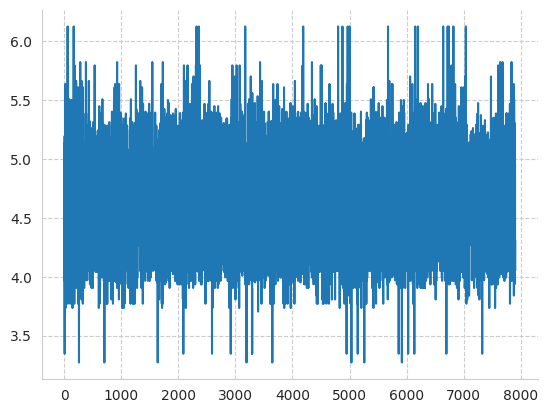

In [56]:
prb_df["SGOT"].plot();

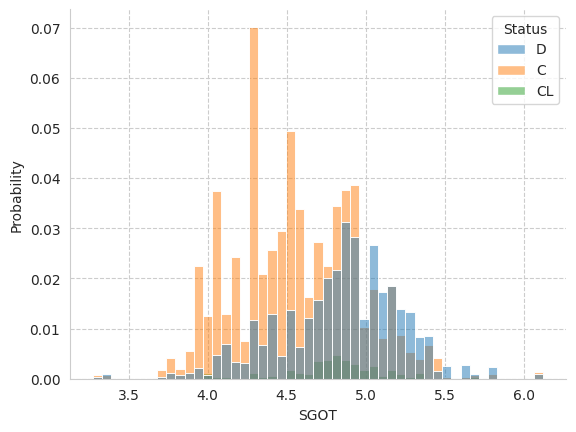

In [57]:
sns.histplot(data=prb_df, x="SGOT", hue="Status", stat="probability");

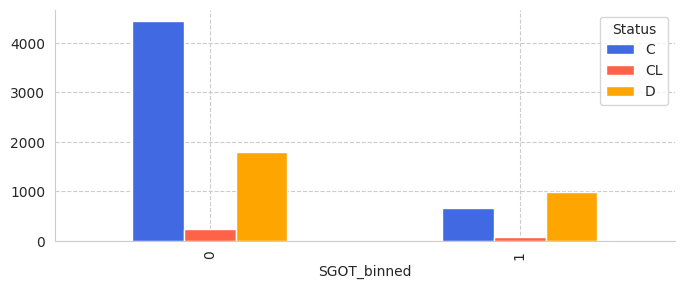

In [58]:
#prb_df["SGOT_binned_"] = pd.cut(prb_df["SGOT"], bins=[0.0,5.0,15.0],labels=[0,1])

fig,axs=plt.subplots(1,1,figsize=(8,3),sharex=True)

stacked_cvar = prb_df.groupby(["Status","SGOT_binned"])["SGOT_binned"].agg("count").unstack("Status")
stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', "Orange"], ax=axs);

##### **Tryglicerides**

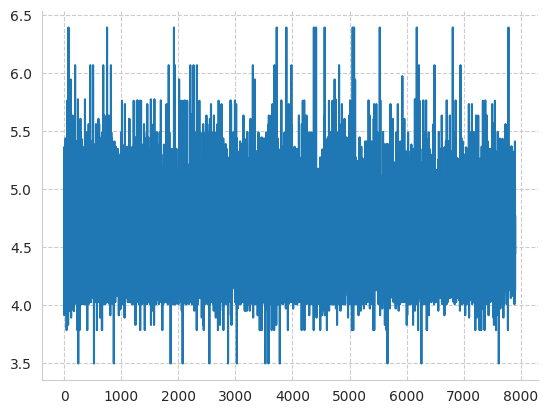

In [59]:
prb_df["Tryglicerides"].plot();

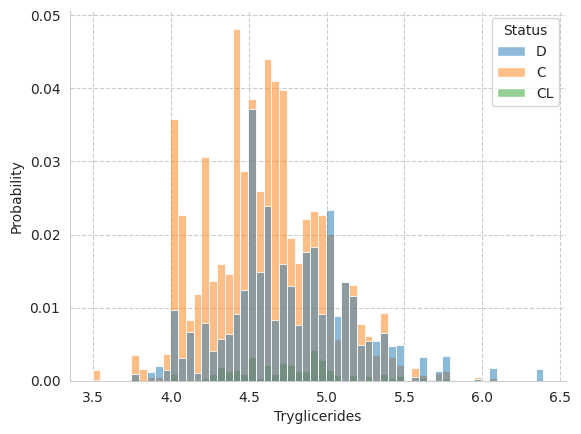

In [60]:
sns.histplot(data=prb_df, x="Tryglicerides", hue="Status", stat="probability");

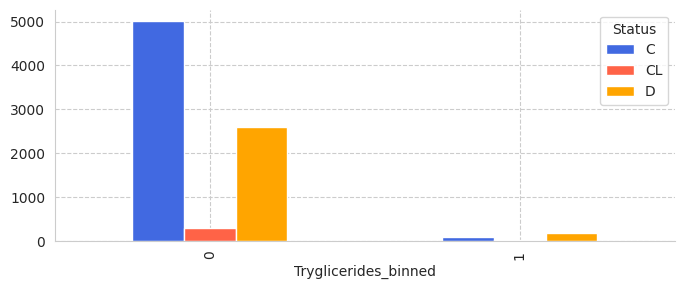

In [61]:
fig,axs=plt.subplots(1,1,figsize=(8,3),sharex=True)

stacked_cvar = prb_df.groupby(["Status","Tryglicerides_binned"])["Tryglicerides_binned"].agg("count").unstack("Status")
stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', "Orange"], ax=axs);

##### **Platelets**

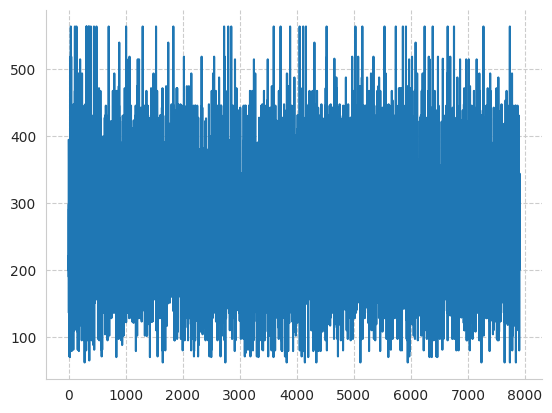

In [62]:
prb_df["Platelets"].plot();

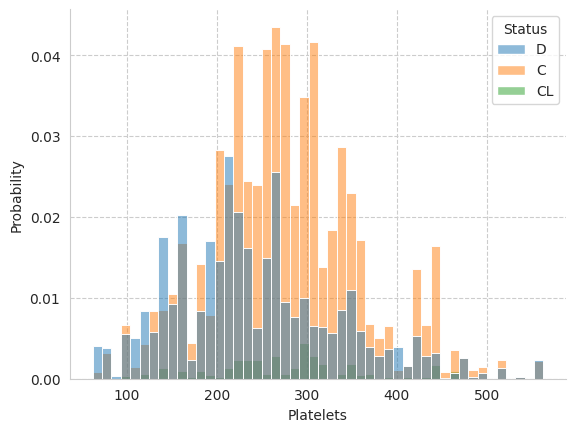

In [63]:
sns.histplot(data=prb_df, x="Platelets", hue="Status", stat="probability",cumulative=False);

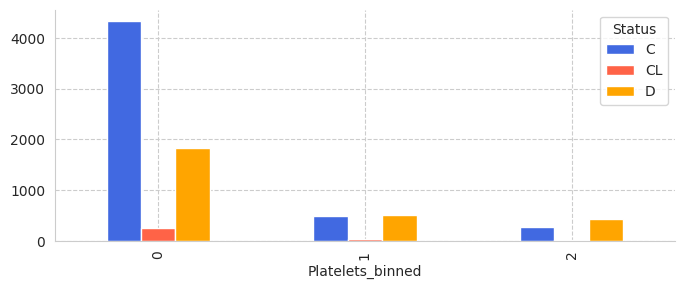

In [64]:
#prb_df["Platelets_binned"].replace({2:0,0:2},inplace=True)  # = pd.cut(prb_df["Platelets"], bins=[0.0,150.0,200.0,1000.],labels=[2,1,0])

fig,axs=plt.subplots(1,1,figsize=(8,3),sharex=True)

stacked_cvar = prb_df.groupby(["Status","Platelets_binned"])["Platelets_binned"].agg("count").unstack("Status")
stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', "Orange"], ax=axs);

##### **Stage**

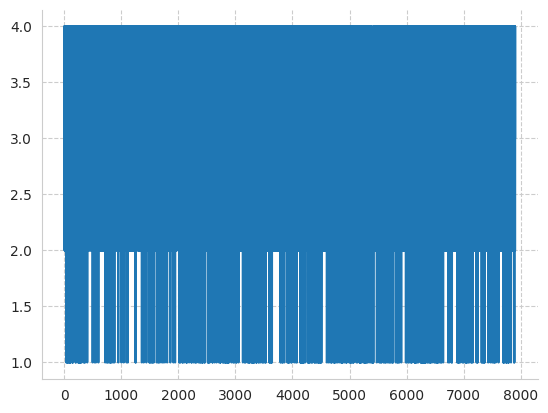

In [65]:
prb_df["Stage"].plot();

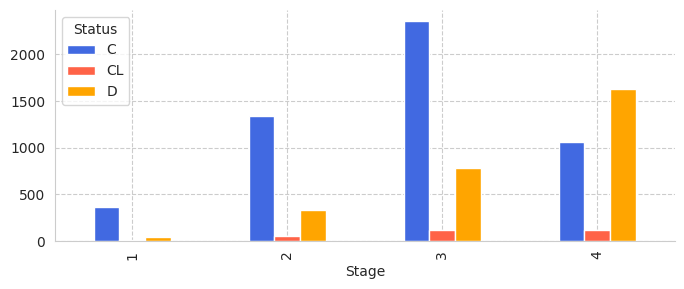

In [66]:
fig,axs=plt.subplots(1,1,figsize=(8,3),sharex=True)

stacked_cvar = prb_df.groupby(["Status","Stage"])["Stage"].agg("count").unstack("Status")
stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', "Orange"], ax=axs);

In [67]:
stacked_cvar

Status,C,CL,D
Stage,,,
1,362,7,40
2,1335,50,326
3,2360,121,783
4,1055,115,1627


##### **ALL TESTs**

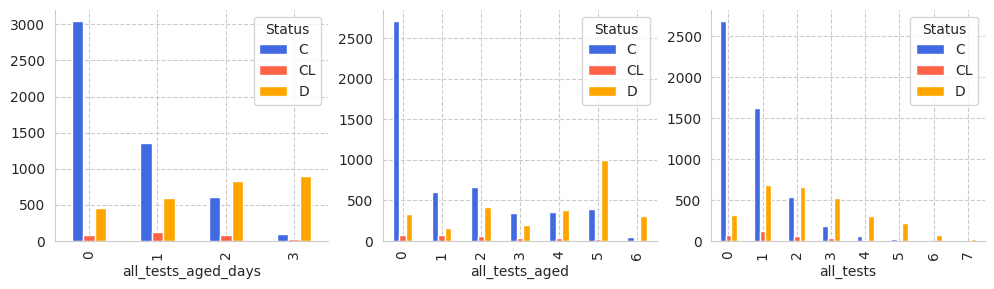

In [68]:
#train_df["all_tests"] = train_df["Prothrombin_binned"].replace({0:0,1:0,2:1,3:1}).astype("int")+train_df["Bilirubin_binned"].replace({0:0,1:0,2:1,3:1}).astype("int")+train_df["Albumin_binned"].replace({0:0,1:0,2:1}).astype("int")+\
#                        train_df["Cholesterol_binned"].astype("int") + train_df["Copper_binned"].replace({0:0,1:1,2:1}).astype("int") + train_df["Alk_Phos_binned"].astype("int")+\
#                        train_df["SGOT_binned"].astype("int") + train_df["Tryglicerides_binned"].astype("int") + train_df["Platelets_binned"].replace({0:0,1:1,2:1}).astype("int")

#train_df["all_tests_aged"] = train_df["all_tests"]*train_df["Age_binned"]
#train_df["all_tests_aged"].replace(dict(zip(np.arange(5,13),[5]*len(np.arange(5,13)))),inplace=True)
#train_df["all_tests_aged"].replace(dict(zip(np.arange(13,200),[6]*len(np.arange(13,200)))),inplace=True)
#train_df["all_tests_aged_days"] = train_df["all_tests_aged"]*train_df["N_Days_binned"].replace({0:4,1:3,3:1,4:0})
#train_df["all_tests_aged_days"].replace({2:1,3:1,4:1,5:1,6:1},inplace=True)
#train_df["all_tests_aged_days"].replace(dict(zip(np.arange(7,16),[2]*len(np.arange(7,16)))),inplace=True)
#train_df["all_tests_aged_days"].replace(dict(zip(np.arange(16,25),[3]*len(np.arange(16,25)))),inplace=True)
#train_df["all_tests_aged_days"].replace(dict(zip(np.arange(25,50),[4]*len(np.arange(25,50)))),inplace=True)

#train_df["all_tests_aged_days_ills"] = train_df["all_tests_aged_days"]*train_df["count_disease"]
#train_df["all_tests_aged_days_ills"].replace({2:1,3:2,4:2,5:2},inplace=True)
#train_df["all_tests_aged_days_ills"].replace({6:3,7:3,8:3,9:3},inplace=True)
#train_df["all_tests_aged_days_ills"].replace(dict(zip(np.arange(10,100),[4]*len(np.arange(10,100)))),inplace=True)

fig,axs=plt.subplots(1,3,figsize=(12,3),sharex=False)
stacked_cvar = train_df.groupby(["Status","all_tests_aged_days"])["all_tests_aged_days"].agg("count").unstack("Status")
stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', "Orange"], ax=axs[0]);
stacked_cvar = train_df.groupby(["Status","all_tests_aged"])["all_tests_aged"].agg("count").unstack("Status")
stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', "Orange"], ax=axs[1]);
stacked_cvar = train_df.groupby(["Status","all_tests"])["all_tests"].agg("count").unstack("Status")
stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', "Orange"], ax=axs[2]);

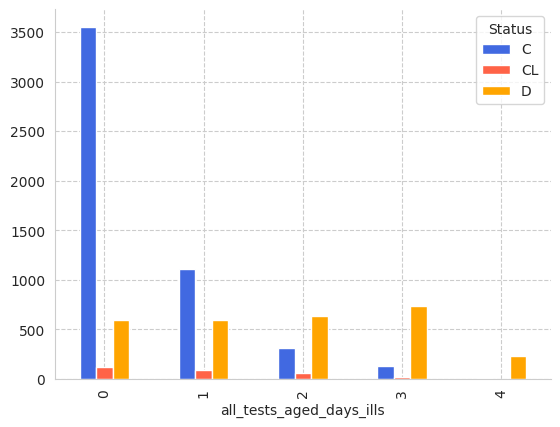

In [69]:
stacked_cvar = train_df.groupby(["Status","all_tests_aged_days_ills"])["all_tests_aged_days_ills"].agg("count").unstack("Status")
stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', "Orange"]);

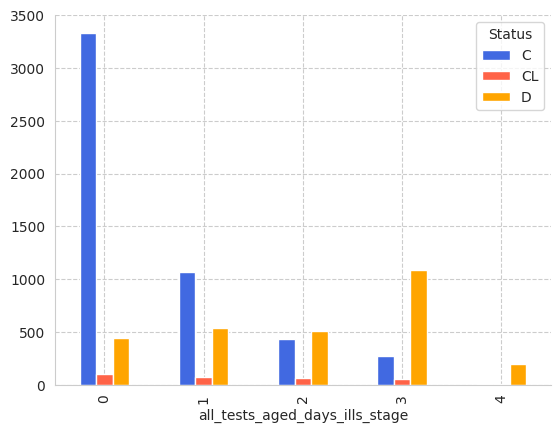

In [70]:
#train_df["all_tests_aged_days_ills_stage"] = train_df["all_tests_aged_days_ills"]+train_df["Stage"]
#train_df["all_tests_aged_days_ills_stage"].replace({1:0,2:0,3:0,4:1,5:2,6:3,7:3,8:4},inplace=True)
#train_df["all_tests_aged_days_ills"].replace({6:3,7:3,8:3,9:3},inplace=True)
#train_df["all_tests_aged_days_ills"].replace(dict(zip(np.arange(10,100),[4]*len(np.arange(10,100)))),inplace=True)

stacked_cvar = train_df.groupby(["Status","all_tests_aged_days_ills_stage"])["all_tests_aged_days_ills_stage"].agg("count").unstack("Status")
stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', "Orange"]);

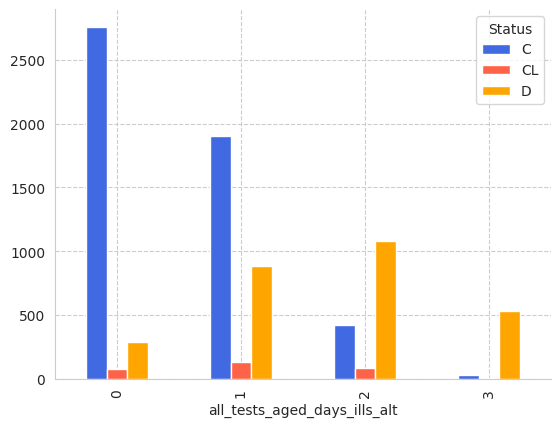

In [71]:
#train_df["all_tests_aged_days_ills_alt"] = train_df["all_tests_aged_days"]+train_df["count_disease"]
#train_df["all_tests_aged_days_ills_alt"].replace({1:0,2:1,3:1,4:2,5:2,6:3,7:3,8:3},inplace=True)
#train_df["all_tests_aged_days_ills"].replace({6:3,7:3,8:3,9:3},inplace=True)
#train_df["all_tests_aged_days_ills"].replace(dict(zip(np.arange(10,100),[4]*len(np.arange(10,100)))),inplace=True)

stacked_cvar = train_df.groupby(["Status","all_tests_aged_days_ills_alt"])["all_tests_aged_days_ills_alt"].agg("count").unstack("Status")
stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato', "Orange"]);

In [72]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8181 entries, 0 to 311
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8181 non-null   int64  
 1   Drug                            8181 non-null   int32  
 2   Sex                             8181 non-null   int32  
 3   Ascites                         8181 non-null   int32  
 4   Hepatomegaly                    8181 non-null   int32  
 5   Spiders                         8181 non-null   int32  
 6   Edema                           8181 non-null   int64  
 7   Bilirubin                       8181 non-null   float64
 8   Cholesterol                     8181 non-null   float64
 9   Albumin                         8181 non-null   float64
 10  Copper                          8181 non-null   float64
 11  Alk_Phos                        8181 non-null   float64
 12  SGOT                            818

In [73]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5271 entries, 0 to 5270
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5271 non-null   int64  
 1   Drug                            5271 non-null   int32  
 2   Sex                             5271 non-null   int32  
 3   Ascites                         5271 non-null   int32  
 4   Hepatomegaly                    5271 non-null   int32  
 5   Spiders                         5271 non-null   int32  
 6   Edema                           5271 non-null   int64  
 7   Bilirubin                       5271 non-null   float64
 8   Cholesterol                     5271 non-null   float64
 9   Albumin                         5271 non-null   float64
 10  Copper                          5271 non-null   float64
 11  Alk_Phos                        5271 non-null   float64
 12  SGOT                            52

## 4.0 Cont Features

In [74]:
num_var = train_df.select_dtypes("float").columns
cat_var = train_df.select_dtypes("int").columns

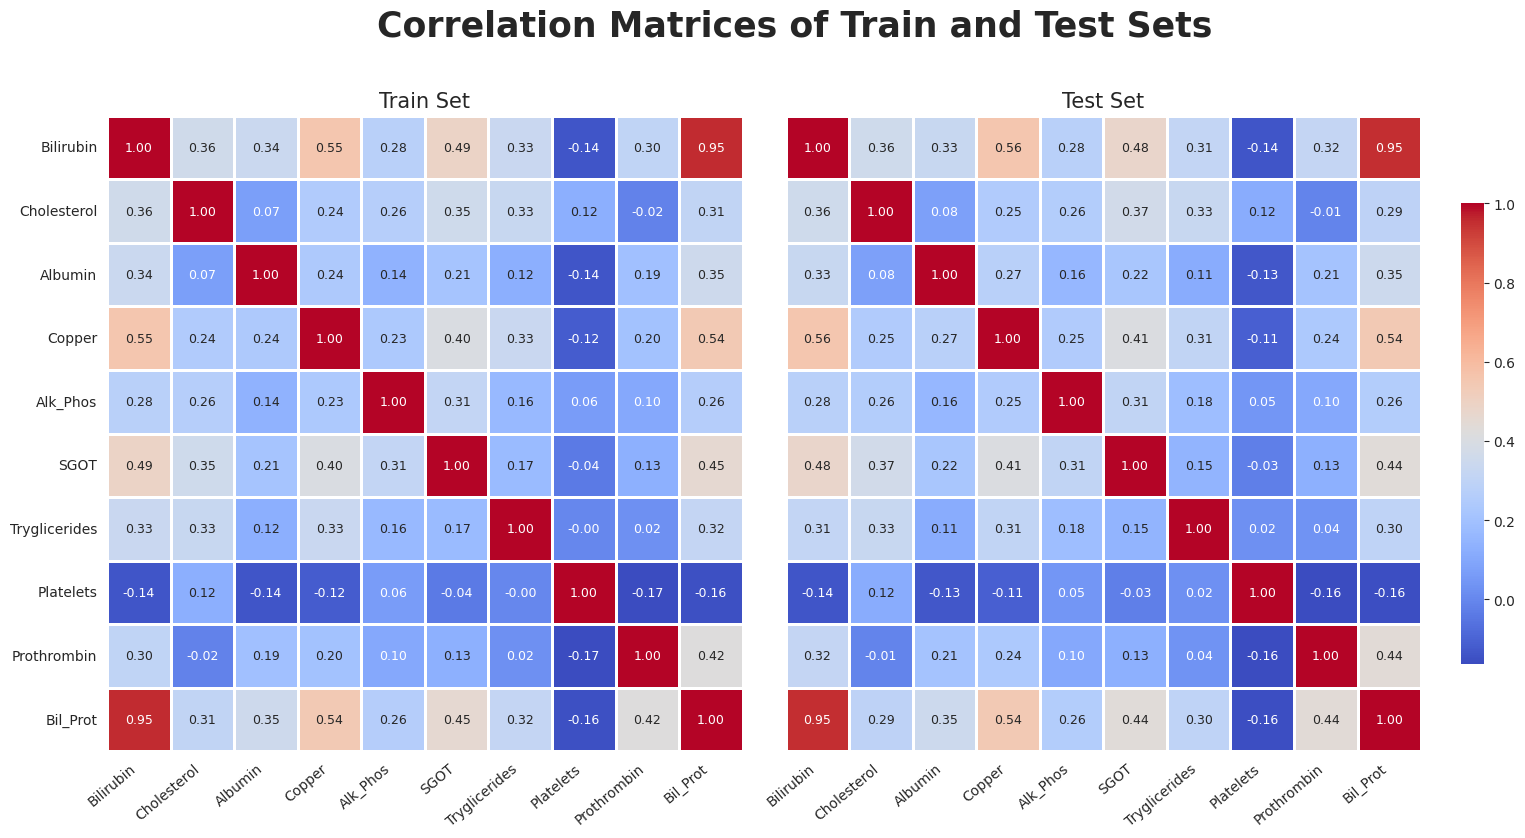

In [75]:
corr_matrix = train_df[num_var].corr()
correlation_plot(data_train=train_df,data_test=test_df,variables=num_var)

##### **Bilirubin**

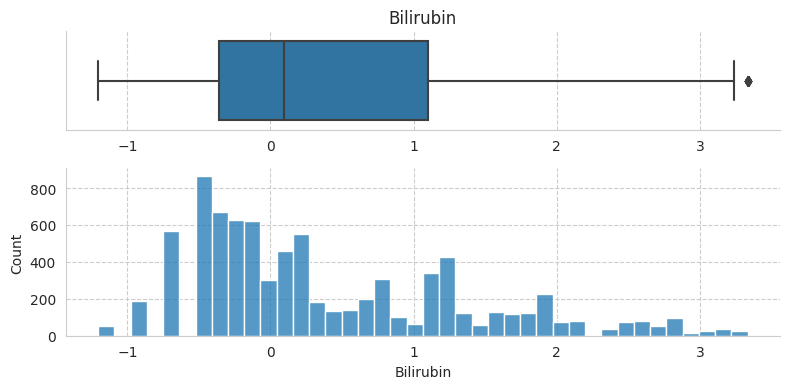

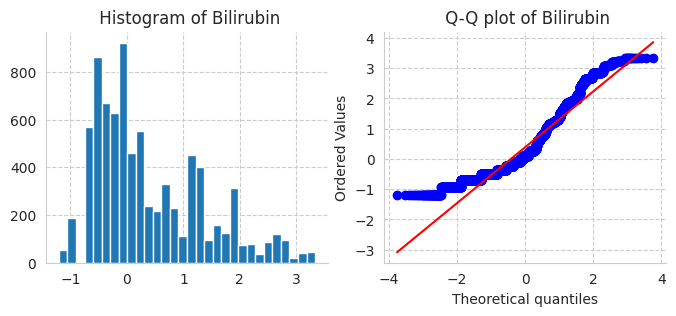

<Figure size 640x480 with 0 Axes>

In [76]:
df_ = train_df.copy()
plot_boxplot_and_hist(df_,"Bilirubin")
diagnostic_plots(df_, "Bilirubin");

In [77]:
scalers = {"None":None,
           "Stand_scaler":StandardScaler(),
           "Min_Max_scaler":MinMaxScaler(),
           "Rob_scaler":RobustScaler(),
           "Power_scaler":PowerTransformer(),
           "Quant_scaler":QuantileTransformer(output_distribution="normal",random_state=78)}

In [79]:
'''
X_ = df_["Bilirubin"].values.reshape(-1, 1).copy()
y_ = df_["Status"].replace({"C":0,"D":1,"CL":2}).astype("int")

cv=StratifiedKFold(random_state=78,shuffle=True, n_splits=12)

for scale in scalers.keys():
  print("-"*20,f" {scale} ","-"*20)
  pipe = Pipeline([('scaler', scalers.get(scale)), ('RF', RandomForestClassifier(class_weight="balanced"))])
  scores = cross_val_score(pipe, X_, y_, cv=cv, scoring='f1_weighted')
  score = np.average(scores)
  stdev = np.std(scores)
  print(f"{scale} Score: {score} and std: {stdev}")
'''

'\nX_ = df_["Bilirubin"].values.reshape(-1, 1).copy()\ny_ = df_["Status"].replace({"C":0,"D":1,"CL":2}).astype("int")\n\ncv=StratifiedKFold(random_state=78,shuffle=True, n_splits=12)\n\nfor scale in scalers.keys():\n  print("-"*20,f" {scale} ","-"*20)\n  pipe = Pipeline([(\'scaler\', scalers.get(scale)), (\'RF\', RandomForestClassifier(class_weight="balanced"))])\n  scores = cross_val_score(pipe, X_, y_, cv=cv, scoring=\'f1_weighted\')\n  score = np.average(scores)\n  stdev = np.std(scores)\n  print(f"{scale} Score: {score} and std: {stdev}")\n'

##### **Cholesterol**

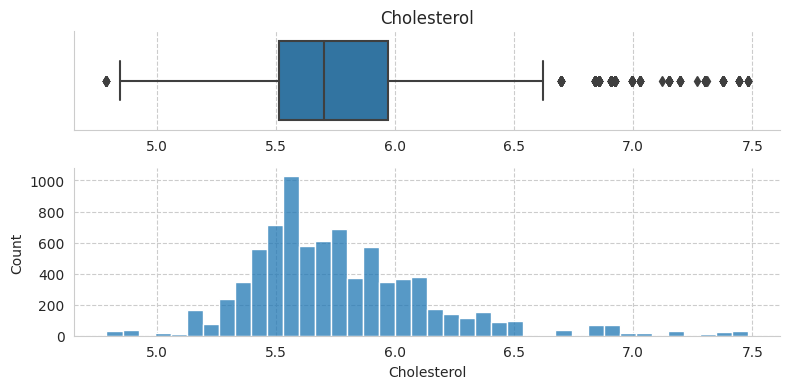

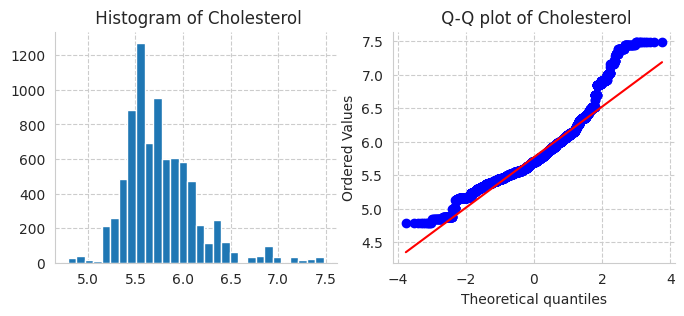

<Figure size 640x480 with 0 Axes>

In [80]:
df_ = train_df.copy()
plot_boxplot_and_hist(df_,"Cholesterol")
diagnostic_plots(df_, "Cholesterol");

In [81]:
scalers = {"None":None,
           "Stand_scaler":StandardScaler(),
           "Min_Max_scaler":MinMaxScaler(),
           "Rob_scaler":RobustScaler(),
           "Power_scaler":PowerTransformer(),
           "Quant_scaler":QuantileTransformer(output_distribution="normal",random_state=78)}

In [82]:
'''
X_ = df_["Cholesterol"].values.reshape(-1, 1).copy()
y_ = df_["Status"].replace({"C":0,"D":1,"CL":2}).astype("int")

cv=StratifiedKFold(random_state=78,shuffle=True, n_splits=12)

for scale in scalers.keys():
  print("-"*20,f" {scale} ","-"*20)
  pipe = Pipeline([('scaler', scalers.get(scale)), ('RF', RandomForestClassifier(class_weight="balanced"))])
  scores = cross_val_score(pipe, X_, y_, cv=cv, scoring='f1_weighted')
  score = np.average(scores)
  stdev = np.std(scores)
  print(f"{scale} Score: {score} and std: {stdev}")
'''

'\nX_ = df_["Cholesterol"].values.reshape(-1, 1).copy()\ny_ = df_["Status"].replace({"C":0,"D":1,"CL":2}).astype("int")\n\ncv=StratifiedKFold(random_state=78,shuffle=True, n_splits=12)\n\nfor scale in scalers.keys():\n  print("-"*20,f" {scale} ","-"*20)\n  pipe = Pipeline([(\'scaler\', scalers.get(scale)), (\'RF\', RandomForestClassifier(class_weight="balanced"))])\n  scores = cross_val_score(pipe, X_, y_, cv=cv, scoring=\'f1_weighted\')\n  score = np.average(scores)\n  stdev = np.std(scores)\n  print(f"{scale} Score: {score} and std: {stdev}")\n'

##### **Albumin**

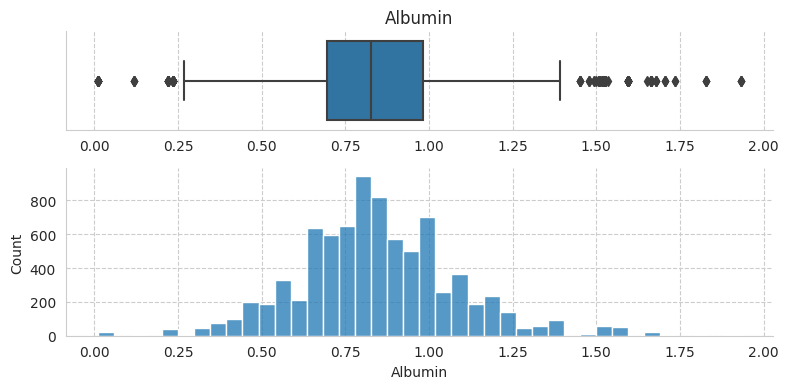

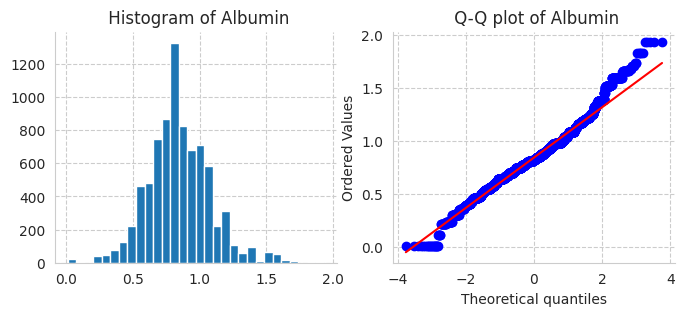

<Figure size 640x480 with 0 Axes>

In [83]:
df_ = train_df.copy()
plot_boxplot_and_hist(df_,"Albumin")
diagnostic_plots(df_, "Albumin");

In [84]:
scalers = {"None":None,
           "Stand_scaler":StandardScaler(),
           "Min_Max_scaler":MinMaxScaler(),
           "Rob_scaler":RobustScaler(),
           "Power_scaler":PowerTransformer(),
           "Quant_scaler":QuantileTransformer(output_distribution="normal",random_state=78)}

In [ ]:
'''
X_ = df_["Albumin"].values.reshape(-1, 1).copy()
y_ = df_["Status"].replace({"C":0,"D":1,"CL":2}).astype("int")

cv=StratifiedKFold(random_state=78,shuffle=True, n_splits=12)

for scale in scalers.keys():
  print("-"*20,f" {scale} ","-"*20)
  pipe = Pipeline([('scaler', scalers.get(scale)), ('RF', RandomForestClassifier(class_weight="balanced"))])
  scores = cross_val_score(pipe, X_, y_, cv=cv, scoring='f1_weighted')
  score = np.average(scores)
  stdev = np.std(scores)
  print(f"{scale} Score: {score} and std: {stdev}")
'''

##### **Copper**

In [ ]:
df_ = train_df.copy()
plot_boxplot_and_hist(df_,"Copper")
diagnostic_plots(df_, "Copper");

In [ ]:
scalers = {"None":None,
           "Stand_scaler":StandardScaler(),
           "Min_Max_scaler":MinMaxScaler(),
           "Rob_scaler":RobustScaler(),
           "Power_scaler":PowerTransformer(),
           "Quant_scaler":QuantileTransformer(output_distribution="normal",random_state=78)}

In [ ]:
'''
X_ = df_["Copper"].values.reshape(-1, 1).copy()
y_ = df_["Status"].replace({"C":0,"D":1,"CL":2}).astype("int")

cv=StratifiedKFold(random_state=78,shuffle=True, n_splits=12)

for scale in scalers.keys():
  print("-"*20,f" {scale} ","-"*20)
  pipe = Pipeline([('scaler', scalers.get(scale)), ('RF', RandomForestClassifier(class_weight="balanced"))])
  scores = cross_val_score(pipe, X_, y_, cv=cv, scoring='f1_weighted')
  score = np.average(scores)
  stdev = np.std(scores)
  print(f"{scale} Score: {score} and std: {stdev}")

##### **Alk_Pos**

In [ ]:
df_ = train_df.copy()
plot_boxplot_and_hist(df_,"Alk_Phos")
diagnostic_plots(df_, "Alk_Phos");

In [ ]:
scalers = {"None":None,
           "Stand_scaler":StandardScaler(),
           "Min_Max_scaler":MinMaxScaler(),
           "Rob_scaler":RobustScaler(),
           "Power_scaler":PowerTransformer(),
           "Quant_scaler":QuantileTransformer(output_distribution="normal",random_state=78)}

In [ ]:
'''
X_ = df_["Alk_Phos"].values.reshape(-1, 1).copy()
y_ = df_["Status"].replace({"C":0,"D":1,"CL":2}).astype("int")

cv=StratifiedKFold(random_state=78,shuffle=True, n_splits=12)

for scale in scalers.keys():
  print("-"*20,f" {scale} ","-"*20)
  pipe = Pipeline([('scaler', scalers.get(scale)), ('RF', RandomForestClassifier(class_weight="balanced"))])
  scores = cross_val_score(pipe, X_, y_, cv=cv, scoring='f1_weighted')
  score = np.average(scores)
  stdev = np.std(scores)
  print(f"{scale} Score: {score} and std: {stdev}")

##### **SGOT**

In [ ]:
df_ = train_df.copy()
plot_boxplot_and_hist(df_,"SGOT")
diagnostic_plots(df_, "SGOT");

In [ ]:
scalers = {"None":None,
           "Stand_scaler":StandardScaler(),
           "Min_Max_scaler":MinMaxScaler(),
           "Rob_scaler":RobustScaler(),
           "Power_scaler":PowerTransformer(),
           "Quant_scaler":QuantileTransformer(output_distribution="normal",random_state=78)}

In [ ]:
'''
X_ = df_["SGOT"].values.reshape(-1, 1).copy()
y_ = df_["Status"].replace({"C":0,"D":1,"CL":2}).astype("int")

cv=StratifiedKFold(random_state=78,shuffle=True, n_splits=12)

for scale in scalers.keys():
  print("-"*20,f" {scale} ","-"*20)
  pipe = Pipeline([('scaler', scalers.get(scale)), ('RF', RandomForestClassifier(class_weight="balanced"))])
  scores = cross_val_score(pipe, X_, y_, cv=cv, scoring='f1_weighted')
  score = np.average(scores)
  stdev = np.std(scores)
  print(f"{scale} Score: {score} and std: {stdev}")

##### **Tryglicerides**

In [ ]:
df_ = train_df.copy()
plot_boxplot_and_hist(df_,"Tryglicerides")
diagnostic_plots(df_, "Tryglicerides");

In [ ]:
scalers = {"None":None,
           "Stand_scaler":StandardScaler(),
           "Min_Max_scaler":MinMaxScaler(),
           "Rob_scaler":RobustScaler(),
           "Power_scaler":PowerTransformer(),
           "Quant_scaler":QuantileTransformer(output_distribution="normal",random_state=78)}

In [ ]:
'''
X_ = df_["Tryglicerides"].values.reshape(-1, 1).copy()
y_ = df_["Status"].replace({"C":0,"D":1,"CL":2}).astype("int")

cv=StratifiedKFold(random_state=78,shuffle=True, n_splits=12)

for scale in scalers.keys():
  print("-"*20,f" {scale} ","-"*20)
  pipe = Pipeline([('scaler', scalers.get(scale)), ('RF', RandomForestClassifier(class_weight="balanced"))])
  scores = cross_val_score(pipe, X_, y_, cv=cv, scoring='f1_weighted')
  score = np.average(scores)
  stdev = np.std(scores)
  print(f"{scale} Score: {score} and std: {stdev}")

##### **Platelets**

In [ ]:
df_ = train_df.copy()
plot_boxplot_and_hist(df_,"Platelets")
diagnostic_plots(df_, "Platelets");

In [ ]:
scalers = {"None":None,
           "Stand_scaler":StandardScaler(),
           "Min_Max_scaler":MinMaxScaler(),
           "Rob_scaler":RobustScaler(),
           "Power_scaler":PowerTransformer(),
           "Quant_scaler":QuantileTransformer(output_distribution="normal",random_state=78)}

In [ ]:
'''
X_ = df_["Platelets"].values.reshape(-1, 1).copy()
y_ = df_["Status"].replace({"C":0,"D":1,"CL":2}).astype("int")

cv=StratifiedKFold(random_state=78,shuffle=True, n_splits=12)

for scale in scalers.keys():
  print("-"*20,f" {scale} ","-"*20)
  pipe = Pipeline([('scaler', scalers.get(scale)), ('RF', RandomForestClassifier(class_weight="balanced"))])
  scores = cross_val_score(pipe, X_, y_, cv=cv, scoring='f1_weighted')
  score = np.average(scores)
  stdev = np.std(scores)
  print(f"{scale} Score: {score} and std: {stdev}")

##### **Prothrombin**

In [ ]:
df_ = train_df.copy()
plot_boxplot_and_hist(df_,"Prothrombin")
diagnostic_plots(df_, "Prothrombin");

In [ ]:
scalers = {"None":None,
           "Stand_scaler":StandardScaler(),
           "Min_Max_scaler":MinMaxScaler(),
           "Rob_scaler":RobustScaler(),
           "Power_scaler":PowerTransformer(),
           "Quant_scaler":QuantileTransformer(output_distribution="normal",random_state=78)}

In [ ]:
'''
X_ = df_["Prothrombin"].values.reshape(-1, 1).copy()
y_ = df_["Status"].replace({"C":0,"D":1,"CL":2}).astype("int")

cv=StratifiedKFold(random_state=78,shuffle=True, n_splits=12)

for scale in scalers.keys():
  print("-"*20,f" {scale} ","-"*20)
  pipe = Pipeline([('scaler', scalers.get(scale)), ('RF', RandomForestClassifier(class_weight="balanced"))])
  scores = cross_val_score(pipe, X_, y_, cv=cv, scoring='f1_weighted')
  score = np.average(scores)
  stdev = np.std(scores)
  print(f"{scale} Score: {score} and std: {stdev}")

##### **Bil_Prot**

In [ ]:
df_ = train_df.copy()
plot_boxplot_and_hist(df_,"Bil_Prot")
diagnostic_plots(df_, "Bil_Prot");

In [ ]:
scalers = {"None":None,
           "Stand_scaler":StandardScaler(),
           "Min_Max_scaler":MinMaxScaler(),
           "Rob_scaler":RobustScaler(),
           "Power_scaler":PowerTransformer(),
           "Quant_scaler":QuantileTransformer(output_distribution="normal",random_state=78)}

In [ ]:
'''
X_ = df_["Bil_Prot"].values.reshape(-1, 1).copy()
y_ = df_["Status"].replace({"C":0,"D":1,"CL":2}).astype("int")

cv=StratifiedKFold(random_state=78,shuffle=True, n_splits=12)

for scale in scalers.keys():
  print("-"*20,f" {scale} ","-"*20)
  pipe = Pipeline([('scaler', scalers.get(scale)), ('RF', RandomForestClassifier(class_weight="balanced"))])
  scores = cross_val_score(pipe, X_, y_, cv=cv, scoring='f1_weighted')
  score = np.average(scores)
  stdev = np.std(scores)
  print(f"{scale} Score: {score} and std: {stdev}")

## 5.0 Identifying CL

In [109]:
cat_var,num_var

(Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage',
        'count_disease', 'Status_C', 'Status_CL', 'Status_D', 'Age_binned',
        'N_Days_binned', 'Prothrombin_binned', 'Bilirubin_binned',
        'Albumin_binned', 'Cholesterol_binned', 'Copper_binned',
        'Alk_Phos_binned', 'SGOT_binned', 'Tryglicerides_binned',
        'Platelets_binned', 'bill_proh_binned', 'all_tests', 'all_tests_aged',
        'all_tests_aged_days', 'all_tests_aged_days_ills',
        'all_tests_aged_days_ills_alt', 'all_tests_aged_days_ills_stage'],
       dtype='object'),
 Index(['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
        'Tryglicerides', 'Platelets', 'Prothrombin', 'Bil_Prot'],
       dtype='object'))

In [110]:
features = ["Bil_Prot","Prothrombin",'Drug', 'Sex',"Copper",'count_disease', 'all_tests', 'all_tests_aged','all_tests_aged_days',
            'all_tests_aged_days_ills','all_tests_aged_days_ills_alt', 'all_tests_aged_days_ills_stage','Age_binned',
            'N_Days_binned', 'Prothrombin_binned', 'Bilirubin_binned',]

pairs = [('Bil_Prot', 'Copper'),
         ("Bilirubin","Prothrombin"),
         ("Copper","SGOT"),
         ("Cholesterol","Albumin"),
         ("Alk_Phos","Albumin"),
         ("Tryglicerides","Bil_Prot"),
         ("Prothrombin","Alk_Phos")]

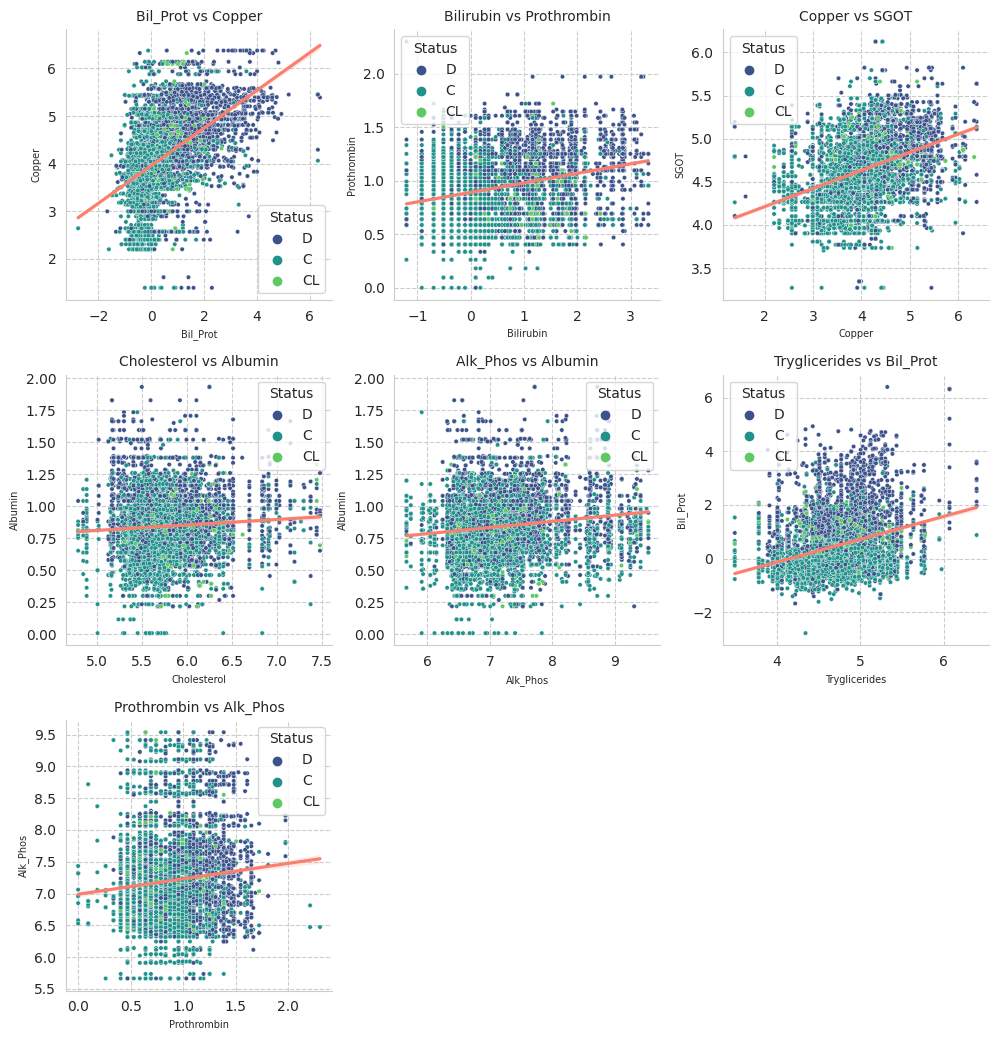

In [111]:
scatter_plot_high_corr_pair(data_set=train_df, target="Status", variable_pairs=pairs);

#### 5.1 Random Forest

In [112]:
df_ = train_df.copy()
df_t = test_df.copy()

X_ = df_[features]
X_t = df_t[features]
y_ = df_["Status"].replace({"C":0,"D":0,"CL":1}).astype("int").copy()
print(len(features))

16


In [206]:
model = RandomForestClassifier(random_state=42,class_weight="balanced",criterion="log_loss")
param = {"n_estimators":[200,300],"max_depth":[None,5,6,7,8], "min_samples_leaf":[1,10,25], "max_features":[8,9]}
cv=StratifiedKFold(random_state=78,shuffle=True, n_splits=5)

In [207]:
grid = GridSearchCV(model, param, scoring="f1_macro",cv=cv, verbose=2)
grid.fit(X_, y_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=None, max_features=8, min_samples_leaf=1, n_estimators=200; total time=   1.9s
[CV] END max_depth=None, max_features=8, min_samples_leaf=1, n_estimators=200; total time=   1.9s
[CV] END max_depth=None, max_features=8, min_samples_leaf=1, n_estimators=200; total time=   1.9s
[CV] END max_depth=None, max_features=8, min_samples_leaf=1, n_estimators=200; total time=   1.9s
[CV] END max_depth=None, max_features=8, min_samples_leaf=1, n_estimators=200; total time=   1.8s
[CV] END max_depth=None, max_features=8, min_samples_leaf=1, n_estimators=300; total time=   2.9s
[CV] END max_depth=None, max_features=8, min_samples_leaf=1, n_estimators=300; total time=   2.8s
[CV] END max_depth=None, max_features=8, min_samples_leaf=1, n_estimators=300; total time=   2.8s
[CV] END max_depth=None, max_features=8, min_samples_leaf=1, n_estimators=300; total time=   2.8s
[CV] END max_depth=None, max_features=8, min_samples_lea

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=78, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='log_loss',
                                              random_state=42),
             param_grid={'max_depth': [None, 5, 6, 7, 8],
                         'max_features': [8, 9],
                         'min_samples_leaf': [1, 10, 25],
                         'n_estimators': [200, 300]},
             scoring='f1_macro', verbose=2)

In [209]:
#best_params = {'max_depth': None,'max_features': 7,'min_samples_leaf': 1,'n_estimators': 200}

grid.best_params_, grid.best_score_

({'max_depth': None,
  'max_features': 8,
  'min_samples_leaf': 10,
  'n_estimators': 300},
 0.6474302097666218)

In [240]:
model = grid.best_estimator_

os.chdir(folders_trees)
#dump(model, 'RF_minclass.joblib')
#model = load('RF_minclass.joblib')
os.chdir(folder_data)

In [241]:
prob_min_class_train = model.predict_proba(X_)
prob_min_class_test = model.predict_proba(X_t)

X_pred = grid.predict(X_)

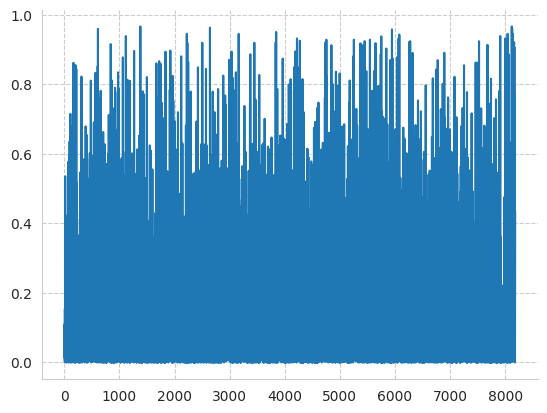

In [242]:
plt.plot(prob_min_class_train[:,1])

In [243]:
(prob_min_class_train[:,1]>0.5).sum()

532

In [244]:
print(classification_report(y_,X_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      7888
           1       0.53      0.96      0.68       293

    accuracy                           0.97      8181
   macro avg       0.76      0.96      0.83      8181
weighted avg       0.98      0.97      0.97      8181



In [245]:
confusion_matrix(y_,X_pred)

array([[7636,  252],
       [  13,  280]])

In [246]:
model = RandomForestClassifier(random_state=0,class_weight="balanced",criterion="log_loss", max_depth = None,
                               max_features= 8, min_samples_leaf = 10, n_estimators = 300)
cv=StratifiedKFold(random_state=78,shuffle=True, n_splits=10)
scores = cross_val_score(model, X_, y_, cv=cv, scoring='recall')

In [247]:
np.average(scores),scores

(0.40954022988505745,
 array([0.4       , 0.44827586, 0.48275862, 0.34482759, 0.31034483,
        0.4137931 , 0.48275862, 0.37931034, 0.5       , 0.33333333]))

In [248]:
np.average(scores),scores

(0.40954022988505745,
 array([0.4       , 0.44827586, 0.48275862, 0.34482759, 0.31034483,
        0.4137931 , 0.48275862, 0.37931034, 0.5       , 0.33333333]))

In [113]:
cv=StratifiedKFold(shuffle=False, n_splits=10)

final_train = train_df.copy()
prob_list = []

y_target = np.array([])
y_pred_ = np.array([])

for train_index, valid_index in tqdm(cv.split(X_,y_)):

  prob_df = pd.DataFrame(index=valid_index, columns=["min_class_feat"])

  tr_, vl_ = X_.iloc[train_index,:], X_.iloc[valid_index,:]
  ytr_, yvl_ = y_.values[train_index], y_.values[valid_index]

  model_verify = RandomForestClassifier(random_state=0,class_weight="balanced",criterion="log_loss", max_depth = None,
                               max_features= 5, min_samples_leaf = 10, n_estimators = 300)

  model_verify.fit(tr_, ytr_)

  y_pred = model_verify.predict(vl_)
  y_prob = model_verify.predict_proba(vl_)[:,1]

  prob_df["min_class_feat"] = y_prob

  y_target = np.append(y_target,yvl_)
  y_pred_ = np.append(y_pred_,y_pred)

  prob_list.append(prob_df)


print(classification_report(y_target,y_pred_))
print(confusion_matrix(y_target,y_pred_))

10it [00:21,  2.13s/it]

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      7888
         1.0       0.26      0.42      0.32       293

    accuracy                           0.94      8181
   macro avg       0.62      0.69      0.64      8181
weighted avg       0.95      0.94      0.94      8181

[[7543  345]
 [ 171  122]]


In [114]:
final_pred = (pd.concat(prob_list,axis=0)>0.5).astype("int32")
final_pred.sort_index(inplace=True)

print(classification_report(y_,final_pred))
print(confusion_matrix(y_,final_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      7888
           1       0.26      0.42      0.32       293

    accuracy                           0.94      8181
   macro avg       0.62      0.69      0.64      8181
weighted avg       0.95      0.94      0.94      8181

[[7543  345]
 [ 171  122]]


In [115]:
final_pred = pd.concat(prob_list,axis=0)
final_pred.sort_index(inplace=True)

os.chdir(folders_trees)
model = load('RF_minclass.joblib')
os.chdir(folder_data)

prob_min_class_test = model.predict_proba(X_t)

train_df["min_class_feat_RF"] = final_pred.values
test_df["min_class_feat_RF"] = prob_min_class_test[:,1]

In [116]:
train_df.to_csv("new_train.csv")
test_df.to_csv("new_test.csv")

#### 5.2 HistGradientBoostingClassifier

In [86]:
features = ["Bil_Prot","Prothrombin",'Drug', 'Sex',"Copper",'count_disease', 'all_tests', 'all_tests_aged','all_tests_aged_days',
            'all_tests_aged_days_ills','all_tests_aged_days_ills_alt', 'all_tests_aged_days_ills_stage','Age_binned',
            'N_Days_binned', 'Prothrombin_binned', 'Bilirubin_binned']

df_ = train_df.copy()
df_t = test_df.copy()

X_ = df_[features]
X_t = df_t[features]
y_ = df_["Status"].replace({"C":0,"D":0,"CL":1}).astype("int").copy()
print(len(features))

16


In [87]:
categorical_features = X_.select_dtypes("int").columns

In [88]:
model = HistGradientBoostingClassifier(max_iter=300,
                                       random_state=42,
                                       class_weight="balanced",
                                       loss="log_loss",
                                       validation_fraction=0.15,
                                       categorical_features=categorical_features,
                                       early_stopping=True,
                                       n_iter_no_change=15)
param = {"max_leaf_nodes":[21,31,41], "max_depth":[None,5,6,7,8], "min_samples_leaf":[20,30,40],"l2_regularization":[0,0.001,0.01,0.1,1.0]}
cv=StratifiedKFold(random_state=78,shuffle=True, n_splits=5)

In [89]:
grid = GridSearchCV(model, param, scoring="f1_macro",cv=cv, verbose=2)
grid.fit(X_, y_)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV] END l2_regularization=0, max_depth=None, max_leaf_nodes=21, min_samples_leaf=20; total time=   0.2s
[CV] END l2_regularization=0, max_depth=None, max_leaf_nodes=21, min_samples_leaf=20; total time=   0.2s
[CV] END l2_regularization=0, max_depth=None, max_leaf_nodes=21, min_samples_leaf=20; total time=   0.2s
[CV] END l2_regularization=0, max_depth=None, max_leaf_nodes=21, min_samples_leaf=20; total time=   0.1s
[CV] END l2_regularization=0, max_depth=None, max_leaf_nodes=21, min_samples_leaf=20; total time=   0.1s
[CV] END l2_regularization=0, max_depth=None, max_leaf_nodes=21, min_samples_leaf=30; total time=   0.2s
[CV] END l2_regularization=0, max_depth=None, max_leaf_nodes=21, min_samples_leaf=30; total time=   0.1s
[CV] END l2_regularization=0, max_depth=None, max_leaf_nodes=21, min_samples_leaf=30; total time=   0.2s
[CV] END l2_regularization=0, max_depth=None, max_leaf_nodes=21, min_samples_leaf=30; total time

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=78, shuffle=True),
             estimator=HistGradientBoostingClassifier(categorical_features=Index(['Drug', 'Sex', 'count_disease', 'all_tests', 'all_tests_aged',
       'all_tests_aged_days', 'all_tests_aged_days_ills',
       'all_tests_aged_days_ills_alt', 'all_tests_aged_days_ills_stage',
       'Age_binned', 'N_Days_binned', 'Prothrombin_binned',
       'Bilirubin_binned'],
      dtype='object'),
                                                      class_weight='balanced',
                                                      early_stopping=True,
                                                      max_iter=300,
                                                      n_iter_no_change=15,
                                                      random_state=42,
                                                      validation_fraction=0.15),
             param_grid={'l2_regularization': [0, 0.001, 0.01, 0.1, 1.0],
                         'max_depth': [None, 5, 6, 7, 8],
                         'max_leaf_nodes': [21, 31, 41],
                         'min_samples_leaf': [20, 30, 40]},
             scoring='f1_macro', verbose=2)

In [90]:
#best_params = {'max_depth': None,'max_features': 7,'min_samples_leaf': 1,'n_estimators': 200}

grid.best_params_, grid.best_score_

({'l2_regularization': 1.0,
  'max_depth': None,
  'max_leaf_nodes': 41,
  'min_samples_leaf': 20},
 0.5904016455225938)

In [91]:
model = grid.best_estimator_

os.chdir(folders_trees)
dump(model, 'HGBC_minclass.joblib')
model = load('HGBC_minclass.joblib')
os.chdir(folder_data)

In [92]:
prob_min_class_train = model.predict_proba(X_)
prob_min_class_test = model.predict_proba(X_t)

X_pred = grid.predict(X_)

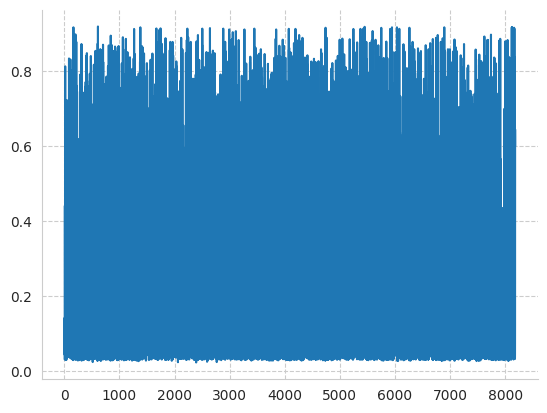

In [93]:
plt.plot(prob_min_class_train[:,1])

In [94]:
(prob_min_class_train[:,1]>0.5).sum()

1087

In [95]:
print(classification_report(y_,X_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94      7888
           1       0.25      0.94      0.40       293

    accuracy                           0.90      8181
   macro avg       0.63      0.92      0.67      8181
weighted avg       0.97      0.90      0.93      8181



In [96]:
confusion_matrix(y_,X_pred)

array([[7076,  812],
       [  18,  275]])

In [98]:
model = HistGradientBoostingClassifier(max_iter=300,
                                       random_state=42,
                                       class_weight="balanced",
                                       loss="log_loss",
                                       validation_fraction=0.15,
                                       categorical_features=categorical_features,
                                       early_stopping=True,
                                       n_iter_no_change=15,
                                       l2_regularization = 1.0,
                                       max_depth = None,
                                       max_leaf_nodes = 41,
                                       min_samples_leaf = 20)

cv=StratifiedKFold(random_state=78,shuffle=True, n_splits=10)
scores = cross_val_score(model, X_, y_, cv=cv, scoring='recall')

In [99]:
np.average(scores),scores

(0.5086206896551724,
 array([0.5       , 0.65517241, 0.62068966, 0.4137931 , 0.4137931 ,
        0.44827586, 0.62068966, 0.4137931 , 0.6       , 0.4       ]))

In [100]:
np.average(scores),scores

(0.5086206896551724,
 array([0.5       , 0.65517241, 0.62068966, 0.4137931 , 0.4137931 ,
        0.44827586, 0.62068966, 0.4137931 , 0.6       , 0.4       ]))

In [101]:
cv=StratifiedKFold(shuffle=False, n_splits=10)

final_train = train_df.copy()
prob_list = []

y_target = np.array([])
y_pred_ = np.array([])

for train_index, valid_index in tqdm(cv.split(X_,y_)):

  prob_df = pd.DataFrame(index=valid_index, columns=["min_class_feat"])

  tr_, vl_ = X_.iloc[train_index,:], X_.iloc[valid_index,:]
  ytr_, yvl_ = y_.values[train_index], y_.values[valid_index]

  model_verify = HistGradientBoostingClassifier(max_iter=300,
                                       random_state=42,
                                       class_weight="balanced",
                                       loss="log_loss",
                                       validation_fraction=0.15,
                                       categorical_features=categorical_features,
                                       early_stopping=True,
                                       n_iter_no_change=15,
                                       l2_regularization = 1.0,
                                       max_depth = None,
                                       max_leaf_nodes = 41,
                                       min_samples_leaf = 20)

  model_verify.fit(tr_, ytr_)

  y_pred = model_verify.predict(vl_)
  y_prob = model_verify.predict_proba(vl_)[:,1]

  prob_df["min_class_feat"] = y_prob

  y_target = np.append(y_target,yvl_)
  y_pred_ = np.append(y_pred_,y_pred)

  prob_list.append(prob_df)


print(classification_report(y_target,y_pred_))
print(confusion_matrix(y_target,y_pred_))

10it [00:02,  4.97it/s]


              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      7888
         1.0       0.16      0.56      0.24       293

    accuracy                           0.88      8181
   macro avg       0.57      0.72      0.59      8181
weighted avg       0.95      0.88      0.91      8181

[[7004  884]
 [ 130  163]]


In [102]:
final_pred = (pd.concat(prob_list,axis=0)>0.5).astype("int32")
final_pred.sort_index(inplace=True)

print(classification_report(y_,final_pred))
print(confusion_matrix(y_,final_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      7888
           1       0.16      0.56      0.24       293

    accuracy                           0.88      8181
   macro avg       0.57      0.72      0.59      8181
weighted avg       0.95      0.88      0.91      8181

[[7004  884]
 [ 130  163]]


In [ ]:
os.chdir(folders_trees)
model = load('HGBC_minclass.joblib')
os.chdir(folder_data)

prob_min_class_test = model.predict_proba(X_t)

train_df["min_class_feat_HGBC"] = final_pred.values
test_df["min_class_feat_HGBC"] = prob_min_class_test[:,1]

In [253]:
#train_df.to_csv("new_train.csv")
#test_df.to_csv("new_test.csv")

In [197]:
train_df.shape,test_df.shape

((8181, 42), (5271, 42))

## **6.0 Models:**

In [141]:
X_train = pd.read_csv("new_train.csv", index_col=0)
X_test = pd.read_csv("new_test.csv", index_col=0)

X_train["weights"] = X_train["Status"]
X_test["weights"] = 1.0

X_train.drop(columns=["id","Status"],inplace=True)
X_test.drop(columns=["id","Status"],inplace=True)

num_var = X_train.select_dtypes("float").columns
cat_var = X_train.select_dtypes("int").columns

X_train[num_var]=X_train[num_var].astype("float32")
X_train[cat_var]=X_train[cat_var].astype("int32")

X_test[num_var]=X_test[num_var].astype("float32")
X_test[cat_var]=X_test[cat_var].astype("int32")

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8181 entries, 0 to 311
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug                            8181 non-null   int32  
 1   Sex                             8181 non-null   int32  
 2   Ascites                         8181 non-null   int32  
 3   Hepatomegaly                    8181 non-null   int32  
 4   Spiders                         8181 non-null   int32  
 5   Edema                           8181 non-null   int32  
 6   Bilirubin                       8181 non-null   float32
 7   Cholesterol                     8181 non-null   float32
 8   Albumin                         8181 non-null   float32
 9   Copper                          8181 non-null   float32
 10  Alk_Phos                        8181 non-null   float32
 11  SGOT                            8181 non-null   float32
 12  Tryglicerides                   818

In [130]:
X_train[["Status_C","Status_CL","Status_D"]].sum()

Status_C     5112
Status_CL     293
Status_D     2776
dtype: int64

In [131]:
weight_for_C = (1 / 5112) * (8181.0 / 3.0)
weight_for_CL = (1 / 293) * (8181.0 / 3.0)
weight_for_D = (1 / 2776) * (8181.0 / 3.0)

class_weight = {"C": weight_for_C, "CL": weight_for_CL, "D": weight_for_D}
X_train["weights"] = X_train["weights"].replace(class_weight)

weight_for_C,weight_for_CL,weight_for_D

(0.5334507042253521, 9.30716723549488, 0.9823487031700288)

In [132]:
summary(X_train).style.background_gradient(cmap='Reds')

data shape: (8181, 41)


,data type,#missing,%missing,#unique,min,max,median
Drug,int32,0,0.000000,2,0.000000,1.000000,1.000000
Sex,int32,0,0.000000,2,0.000000,1.000000,0.000000
Ascites,int32,0,0.000000,2,0.000000,1.000000,0.000000
Hepatomegaly,int32,0,0.000000,2,0.000000,1.000000,1.000000
Spiders,int32,0,0.000000,2,0.000000,1.000000,0.000000
Edema,int32,0,0.000000,3,0.000000,2.000000,0.000000
Bilirubin,float32,0,0.000000,111,-1.203973,3.332205,0.095310
Cholesterol,float32,0,0.000000,226,4.787492,7.481556,5.700444
Albumin,float32,0,0.000000,160,0.009950,1.932063,0.826912
Copper,float32,0,0.000000,171,1.386294,6.376727,4.143135


In [133]:
def dataframe_to_dataset(dataframe, shuffle=False, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe[["Status_C","Status_CL","Status_D"]]
    dataframe = dataframe.drop(columns=["Status_C","Status_CL","Status_D"])
    weights = dataframe.pop("weights")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels, weights))
    if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    return ds

In [138]:
train_ds = dataframe_to_dataset(X_train,batch_size=32)
test_ds = dataframe_to_dataset(X_test,batch_size=32)

In [140]:
train_ds_with_no_labels = train_ds.map(lambda x, *_ : x)

def example_feature_space(dataset, feature_space, feature_names):
    feature_space.adapt(dataset)
    for x in dataset.take(1):
        inputs = {feature_name: x[feature_name] for feature_name in feature_names}
        preprocessed_x = feature_space(inputs)
        print(f"Input: {[{k:v.numpy()} for k, v in inputs.items()]}")
        print(f"Preprocessed output: {[{k:v.numpy()} for k, v in preprocessed_x.items()]}")

In [146]:
num_var = list(num_var)
cat_var = list(cat_var)
cat_var.remove('Status_C')
cat_var.remove('Status_CL')
cat_var.remove('Status_D')

In [147]:
feature_space_dict = FeatureSpace(
                                  features={**{a:FeatureSpace.integer_categorical(num_oov_indices=0, output_mode="one_hot") for a in cat_var},**{a:FeatureSpace.float_normalized() for a in num_var}},
                                  # Specify feature cross with a custom crossing dim.
                                  #crosses=[FeatureSpace.cross(feature_names=("awa_cat","grouped_atomicweight"), crossing_dim=8, output_mode="one_hot")],
                                  output_mode="dict"
                                  )

feature_space_conc = FeatureSpace(
                                  features={**{a:FeatureSpace.integer_categorical(num_oov_indices=0, output_mode="one_hot") for a in cat_var},**{a:FeatureSpace.float_normalized() for a in num_var}},
                                  # Specify feature cross with a custom crossing dim.
                                  #crosses=[FeatureSpace.cross(feature_names=("awa_cat","grouped_atomicweight"), crossing_dim=8, output_mode="one_hot")],
                                  output_mode="concat"
                                  )

In [148]:
%%time
train_ds_with_no_labels = train_ds.map(lambda x, *_: x)
feature_space_dict.adapt(train_ds_with_no_labels)
feature_space_conc.adapt(train_ds_with_no_labels)

CPU times: user 56.6 s, sys: 3.07 s, total: 59.7 s
Wall time: 39.8 s


In [172]:
for x, y, w in train_ds.take(1):
    preprocessed_x = feature_space_conc(x)
    print("preprocessed_x.shape:", preprocessed_x.shape)
    print("preprocessed_x.dtype:", preprocessed_x.dtype)
    print("preprocessed_y.shape:", y.shape)
    print("preprocessed_w.shape:", w.shape)

preprocessed_x.shape: (32, 110)
preprocessed_x.dtype: <dtype: 'float32'>
preprocessed_y.shape: (32, 3)
preprocessed_w.shape: (32,)


In [153]:
preprocessed_train_ds_dict = train_ds.map(lambda x, y, w: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
preprocessed_test_ds_dict = test_ds.map(lambda x, y, w: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

preprocessed_train_ds_conc = train_ds.map(lambda x, y, w: (feature_space_conc(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
preprocessed_test_ds_conc = test_ds.map(lambda x, y, w: (feature_space_conc(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [154]:
for x, y in preprocessed_train_ds_conc.take(1):
    print("preprocessed_x.shape:", x.shape)
    print("y.dtype:", y.shape)

preprocessed_x.shape: (32, 110)
y.dtype: (32, 3)


In [155]:
encoded_features_dict = feature_space_dict.get_encoded_features()
print(encoded_features_dict)

{'Age_binned': <KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'category_encoding')>, 'Albumin': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'float_normalized_3_preprocessor')>, 'Albumin_binned': <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_1')>, 'Alk_Phos': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'float_normalized_5_preprocessor')>, 'Alk_Phos_binned': <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'category_encoding_2')>, 'Ascites': <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'category_encoding_3')>, 'Bil_Prot': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'float_normalized_10_preprocessor')>, 'Bilirubin': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'float_normalized_1_preprocessor')>, 'Bilirubin_binned': <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_4')>, 'Cholesterol': <KerasTensor: shape=(Non

### 6.1 Baseline:

In [160]:
def create_baseline_model(fs,name="baseline_model",learning_rate = 0.001,
                          activation="relu",gn_noise=0.0,dropout=0.5,hidden_layers=3,
                          units_0=256,units_1=256,):

  encoded_features_conc = fs.get_encoded_features()

  x = tf.keras.layers.Dense(units_0, activation=activation, name="dense_in")(encoded_features_conc)
  x = tf.keras.layers.BatchNormalization(name="bn_in")(x)
  x = tf.keras.layers.Dropout(dropout,name="do_in")(x)

  x = tf.keras.layers.GaussianNoise(stddev=gn_noise, name="gsn")(x)

  for lr in range(hidden_layers):
    x = tf.keras.layers.Dense(units_1, activation=activation, name=f"dense_{lr}")(x)
    x = tf.keras.layers.BatchNormalization(name=f"bn_{lr}")(x)
    x = tf.keras.layers.Dropout(dropout,name=f"do_{lr}")(x)

  output = tf.keras.layers.Dense(3, activation="softmax",name="output_final")(x)

  model = tf.keras.Model(inputs=encoded_features_conc, outputs=output, name=name)

  model.compile(
          optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
          loss=tf.keras.losses.CategoricalCrossentropy(name="cat_ce"),
          metrics=[keras.metrics.AUC(curve="PR")])

  return model

In [161]:
model = create_baseline_model(feature_space_conc)
model.summary()

Model: "baseline_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 110)]             0         
                                                                 
 dense_in (Dense)            (None, 256)               28416     
                                                                 
 bn_in (BatchNormalization)  (None, 256)               1024      
                                                                 
 do_in (Dropout)             (None, 256)               0         
                                                                 
 gsn (GaussianNoise)         (None, 256)               0         
                                                                 
 dense_0 (Dense)             (None, 256)               65792     
                                                                 
 bn_0 (BatchNormalization)   (None, 256)            

### 6.2 KerasTuner

In [173]:
X_trn, X_val = train_test_split(X_train, random_state=2023, test_size=0.3)

feature_space = FeatureSpace(
                            features={**{a:FeatureSpace.integer_categorical(num_oov_indices=0, output_mode="one_hot") for a in cat_var},**{a:FeatureSpace.float_normalized() for a in num_var}},
                            # Specify feature cross with a custom crossing dim.
                            crosses=[FeatureSpace.cross(feature_names=("count_disease","bill_proh_binned"), crossing_dim=10, output_mode="one_hot")],
                            output_mode="concat"
                            )

train_dataset = dataframe_to_dataset(X_trn, batch_size=32, shuffle=True)
valid_dataset = dataframe_to_dataset(X_val, batch_size=32, shuffle=False)

train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
feature_space.adapt(train_ds_with_no_labels)

preprocessed_train_ds = train_dataset.map(lambda x, y, w: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
preprocessed_valid_ds = valid_dataset.map(lambda x, y, w: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [175]:
# Define the hyperparameter search space: EXPERIMENT 1
hp = kt.HyperParameters()
hp.Choice('gn_noise', values=[0.05, 0.0])
hp.Choice('dropout', values=[0.33, 0.50])
hp.Choice('units_0', values=[256, 512])
hp.Choice('hidden_layers', values=[1, 2, 3, 4])
hp.Choice('units_1', values=[64, 128, 256])
hp.Choice('activation', values=['swish', 'gelu', 'relu']);

In [176]:
# TRAIN MODEL
# Define Preprocessing steps:
def create_turner_model(hp):

  encoded_features_conc = feature_space.get_encoded_features()

  x = tf.keras.layers.Dense(hp.get('units_0'), activation=hp.get('activation'), name="dense_in")(encoded_features_conc)
  x = tf.keras.layers.BatchNormalization(name="bn_in")(x)
  x = tf.keras.layers.Dropout(hp.get('dropout'),name="do_in")(x)

  x = tf.keras.layers.GaussianNoise(stddev=hp.get('gn_noise'), name="gsn")(x)

  for lr in range(hp.get('hidden_layers')):
    x = tf.keras.layers.Dense(hp.get('units_1'), activation=hp.get('activation'), name=f"dense_{lr}")(x)
    x = tf.keras.layers.BatchNormalization(name=f"bn_{lr}")(x)
    x = tf.keras.layers.Dropout(hp.get('dropout'),name=f"do_{lr}")(x)


  output = tf.keras.layers.Dense(3, activation="softmax",name="output_final")(x)

  model = tf.keras.Model(inputs=encoded_features_conc, outputs=output, name="model_tuner")

  model.compile(
          optimizer=keras.optimizers.Adam(learning_rate=0.001),
          loss=tf.keras.losses.CategoricalCrossentropy(name="cat_ce"),
          metrics=[keras.metrics.AUC(curve="PR")])

  return model

In [178]:
# Create a tuner and search for the best hyperparameters
tuner = BayesianOptimization(create_turner_model,
                             objective="val_loss",
                             hyperparameters=hp, max_trials=40, overwrite=True)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

tuner.search(preprocessed_train_ds, validation_data=preprocessed_valid_ds, epochs=51,
             callbacks=[stop_early,reduce_]
             )


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
0.05              |0.05              |gn_noise
0.33              |0.33              |dropout
512               |512               |units_0
3                 |3                 |hidden_layers
64                |64                |units_1
swish             |swish             |activation

Epoch 1/51
179/179 [==============================] - 5s 12ms/step - loss: 0.8857 - auc: 0.7235 - val_loss: 0.6040 - val_auc: 0.8517 - lr: 0.0010
Epoch 2/51
179/179 [==============================] - 2s 10ms/step - loss: 0.6414 - auc: 0.8186 - val_loss: 0.5199 - val_auc: 0.8792 - lr: 0.0010
Epoch 3/51
179/179 [==============================] - 2s 10ms/step - loss: 0.5784 - auc: 0.8409 - val_loss: 0.4884 - val_auc: 0.8858 - lr: 0.0010
Epoch 4/51
179/179 [==============================] - 2s 10ms/step - loss: 0.5475 - auc: 0.8525 - val_loss: 0.4850 - val_auc: 0.8867 - lr: 0.0010
Epoch 5/51
179/179 [=============================

KeyboardInterrupt: ignored

**Experiment Run Function**

In [187]:
def run_experiment(train,test_data_file,input_format="concat",experiment_name="model_baseline",splits=8, num_epochs=200, batch_size=32):

  skf = KFold(n_splits=splits)
  test_results_df = pd.DataFrame(index=test_data_file.index, columns=list(range(splits)))
  all_maed = []


  for i, (train_index, valid_index) in enumerate(skf.split(train)):

    print(f"\nRunning CV {i}\n")
    # Prepare the Dataset:
    train_data_file = train.iloc[train_index,:]
    val_data_file = train.iloc[valid_index,:]

    train_dataset = dataframe_to_dataset(train_data_file, batch_size=batch_size, shuffle=True)
    valid_dataset = dataframe_to_dataset(val_data_file, batch_size=batch_size, shuffle=False)
    test_dataset = dataframe_to_dataset(test_data_file, batch_size=batch_size, shuffle=False)


    feature_space = FeatureSpace(
                                features={**{a:FeatureSpace.integer_categorical(num_oov_indices=0, output_mode="one_hot") for a in cat_var},**{a:FeatureSpace.float_normalized() for a in num_var}},
                                # Specify feature cross with a custom crossing dim.
                                crosses=[FeatureSpace.cross(feature_names=("count_disease","bill_proh_binned"), crossing_dim=10, output_mode="one_hot")],
                                output_mode=input_format
                                )

    train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
    print("Adapting Features Space....")
    feature_space.adapt(train_ds_with_no_labels)

    preprocessed_train_ds = train_dataset.map(lambda x, y, w: (feature_space(x), y, w), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
    preprocessed_valid_ds = valid_dataset.map(lambda x, y, w: (feature_space(x), y, w), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
    preprocessed_test_ds = test_dataset.map(lambda x, y, w: (feature_space(x), y, w), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

    # Callbacks:
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)
    reduce_on_plat = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
    checkpoint_filepath = folders_nn + 'checkpoint/'
    Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_weights_only=True,
                                                    monitor="val_loss",
                                                    mode='min',
                                                    restore_best_weights=True)

    # Generate Model
    model = create_baseline_model(feature_space,
                                  name=experiment_name,
                                  learning_rate = 0.001,
                                  activation="relu",
                                  gn_noise=0.05,
                                  dropout=0.33,
                                  hidden_layers=3,
                                  units_0=256,
                                  units_1=128)

    print("Start training the model...")
    history = model.fit(preprocessed_train_ds, epochs=num_epochs, callbacks=[early_stopping,Checkpoint,reduce_on_plat],validation_data=preprocessed_valid_ds)
    print("Model training finished")

    model.load_weights(checkpoint_filepath)
    MedAE, MAE = model.evaluate(preprocessed_valid_ds, verbose=0)

    plot_training_session(history)

    y_hat = model.predict(preprocessed_test_ds)

    test_results_df.loc[:,i] = y_hat

    model.save(f'{folders_nn+experiment_name}/CV_{i}')
    feature_space.save(f"{folders_nn+experiment_name}/CV_{i}/myfeaturespace_{experiment_name}.keras")


    print(f"Test MedAE: {round(MedAE, 2)}%")
    all_maed.append(round(MedAE, 3))

  print(f"All Valuation MedAE: {all_maed}")
  return test_results_df

In [188]:
test_results_df = run_experiment(X_train,X_test,input_format="concat",experiment_name="model_baseline_ext_v3",splits=8, num_epochs=200, batch_size=32)


Running CV 0

Adapting Features Space....
Start training the model...
Epoch 1/200


UnimplementedError: ignored